In [211]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [158]:
def scrape_NBA_per_poss_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_per_poss.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[1:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_per_poss_data.csv", index=False)

In [159]:
scrape_NBA_per_poss_data(years = [2017,2018,2019,2020,2021])

<bound method DataFrame.info of                        Player    Pos   Age    Tm     G    GS    MP    FG  \
0                Álex Abrines     SG    23   OKC    68     6  1055   6.2   
1                  Quincy Acy     PF    26   TOT    38     1   558   6.0   
2                  Quincy Acy     PF    26   DAL     6     0    48   5.4   
3                  Quincy Acy     PF    26   BRK    32     1   510   6.0   
4                Steven Adams      C    23   OKC    80    80  2389   7.7   
5               Arron Afflalo     SG    31   SAC    61    45  1580   5.9   
6               Alexis Ajinça      C    28   NOP    39    15   584   7.5   
7                Cole Aldrich      C    28   MIN    62     0   531   4.3   
8           LaMarcus Aldridge     PF    31   SAS    72    72  2335  10.9   
9                 Lavoy Allen     PF    27   IND    61     5   871   4.4   
10                 Tony Allen     SG    35   MEM    71    66  1914   7.4   
11            Al-Farouq Aminu     PF    26   POR    61  

In [160]:
def scrape_NBA_advanced_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[1:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_advanced_data.csv", index=False)

In [161]:
scrape_NBA_advanced_data(years = [2017,2018,2019,2020,2021])

<bound method DataFrame.info of                        Player    Pos   Age    Tm     G    MP    PER    TS%  \
0                Álex Abrines     SG    23   OKC    68  1055   10.1   .560   
1                  Quincy Acy     PF    26   TOT    38   558   11.8   .565   
2                  Quincy Acy     PF    26   DAL     6    48   -1.4   .355   
3                  Quincy Acy     PF    26   BRK    32   510   13.1   .587   
4                Steven Adams      C    23   OKC    80  2389   16.5   .589   
5               Arron Afflalo     SG    31   SAC    61  1580    8.9   .559   
6               Alexis Ajinça      C    28   NOP    39   584   12.9   .529   
7                Cole Aldrich      C    28   MIN    62   531   12.7   .549   
8           LaMarcus Aldridge     PF    31   SAS    72  2335   18.6   .532   
9                 Lavoy Allen     PF    27   IND    61   871   11.6   .485   
10                 Tony Allen     SG    35   MEM    71  1914   13.3   .493   
11            Al-Farouq Aminu   

In [162]:
def scrape_NBA_shooting_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_shooting.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[2:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_shooting_data.csv", index=False)

In [163]:
scrape_NBA_shooting_data(years = [2017,2018,2019,2020,2021])

<bound method DataFrame.info of                        Player    Pos   Age    Tm     G    MP    FG% Dist.  \
0                Álex Abrines     SG    23   OKC    68  1055   .393  20.6   
1                  Quincy Acy     PF    26   TOT    38   558   .412  16.2   
2                  Quincy Acy     PF    26   DAL     6    48   .294  15.3   
3                  Quincy Acy     PF    26   BRK    32   510   .425  16.3   
4                Steven Adams      C    23   OKC    80  2389   .571   3.7   
5               Arron Afflalo     SG    31   SAC    61  1580   .440  16.8   
6               Alexis Ajinça      C    28   NOP    39   584   .500   9.0   
7                Cole Aldrich      C    28   MIN    62   531   .523   3.0   
8           LaMarcus Aldridge     PF    31   SAS    72  2335   .477  11.8   
9                 Lavoy Allen     PF    27   IND    61   871   .458   8.9   
10                 Tony Allen     SG    35   MEM    71  1914   .461   5.6   
11            Al-Farouq Aminu     PF    26  

In [164]:
df1 = pd.read_csv("nba_per_poss_data.csv")
df2 = pd.read_csv("nba_advanced_data.csv")
df3 = pd.read_csv("nba_shooting_data.csv")

In [165]:
from functools import reduce
data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Player', 'Age', 'Tm'],
                                            how='outer'), data_frames)

In [166]:
df = df_merged.dropna(axis=0, how='all')

In [167]:
df = df.dropna(axis=1, how='all')

In [168]:
df.shape

(3323, 78)

In [169]:
testdf = df[(df.G > 40)].reset_index(drop=True)

In [180]:
testdf = testdf.drop(columns= ["Pos_x","G_x", "MP_x", "Pos_y", "G_y", "MP_y"])

In [189]:
testdf = testdf.fillna(0)

In [190]:
testdf.shape

(1761, 72)

In [191]:
features = [x for x in testdf.columns if (x != 'Player') & (x != 'Pos') & (x != 'Tm') ]
x = testdf.loc[:, features].values
y = testdf.loc[:,['Player']].values

In [192]:
x = StandardScaler().fit_transform(x)

In [268]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

final = pd.concat([principalDf, testdf[['Player','Pos']]], axis=1)

final = final[['Player','Pos','pc1','pc2']]
final.columns = ['Player','Pos','pc1','pc2']

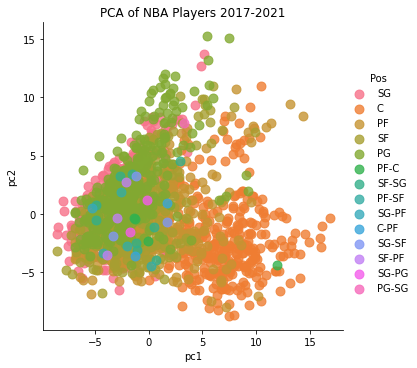

In [218]:
sns.lmplot( x="pc1", y="pc2",
  data=final, 
  fit_reg=False, 
  hue='Pos', 
  legend=True,
  scatter_kws={"s": 80}).set(title='PCA of NBA Players 2017-2021')

In [219]:
fimp1 = pd.DataFrame(data={'pc':features,'imp':pca.components_[0]}) # feature importance for first dimension

fimp2 = pd.DataFrame(data={'pc':features,'imp':pca.components_[1]}) # feature importance for second dimension

<Figure size 432x432 with 0 Axes>

<BarContainer object of 31 artists>

Text(0.5, 1.0, 'Important positive features for Dimension 1')

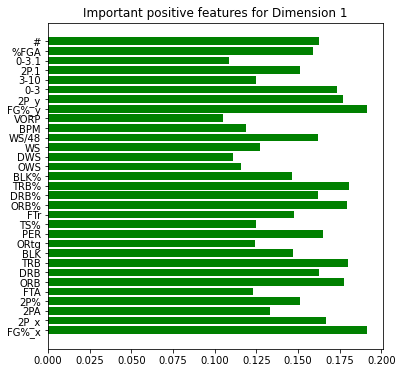

In [240]:
fimp1pos = fimp1[(fimp1.imp > .10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp1pos)
plt.title("Important positive features for Dimension 1")

<Figure size 432x432 with 0 Axes>

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Important negative features for Dimension 1')

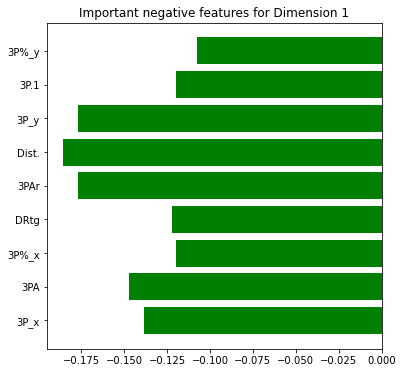

In [244]:
fimp1neg = fimp1[(fimp1.imp < -.10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp1neg)
plt.title("Important negative features for Dimension 1")

<Figure size 432x432 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, 'Important positive features for Dimension 2')

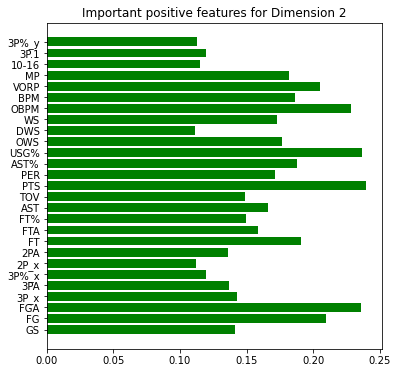

In [243]:
fimp2pos = fimp2[(fimp2.imp > .10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp2pos)
plt.title("Important positive features for Dimension 2")

<Figure size 432x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Important negative features for Dimension 2')

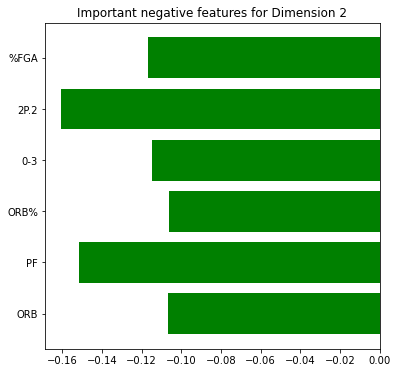

In [245]:
fimp2neg = fimp2[(fimp2.imp < -.10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp2neg)
plt.title("Important negative features for Dimension 2")

In [253]:
pca.explained_variance_ratio_.cumsum()

array([0.30547686, 0.48758105])

In [277]:
pca2 = PCA(n_components=0.99)
pca2.fit(x)
principalComponents2 = pca2.transform(x)

principalComponents2.shape

PCA(n_components=0.99)

(1761, 33)

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'bic')

Text(0.5, 1.0, 'bayesian information criterion (bic) method')

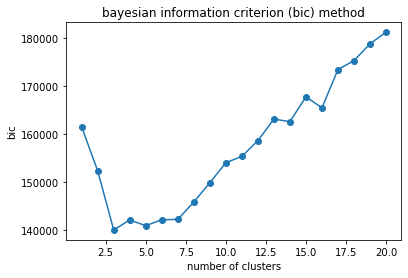

In [280]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents2)
          for n in n_components]

plt.plot(n_components, [m.bic(principalComponents2) for m in models], label='BIC')
plt.scatter(n_components, [m.bic(principalComponents2) for m in models])
plt.xlabel('number of clusters')
plt.ylabel('bic')
plt.title('bayesian information criterion (bic) method')

In [292]:
gmm = GaussianMixture(n_components=7).fit(principalComponents)
labels = gmm.predict(principalComponents)
final['cluster'] = labels
testdf['cluster'] = labels

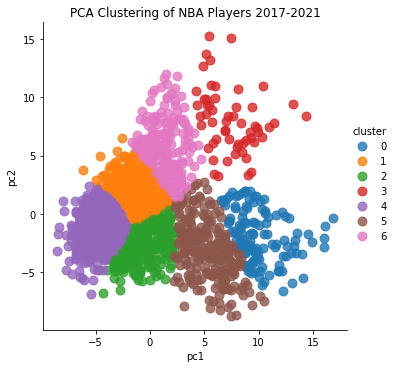

In [288]:
sns.lmplot( x="pc1", y="pc2",
  data=final, 
  fit_reg=False, 
  hue='cluster', 
  legend=True,
  scatter_kws={"s": 80}).set(title='PCA Clustering of NBA Players 2017-2021')

In [289]:
final.cluster.value_counts()

4    466
1    446
2    280
5    228
6    167
0    117
3     57
Name: cluster, dtype: int64

In [305]:
testdf.loc[testdf['cluster'] == 0]
testdf.loc[testdf['cluster'] == 0].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
1          Steven Adams  23.0  OKC  80.0   7.7  13.5  0.571   0.0  0.0  0.000   
54         Clint Capela  22.0  HOU  59.0  11.2  17.4  0.643   0.0  0.0  0.000   
59       Tyson Chandler  34.0  PHO  46.0   5.6   8.4  0.671   0.0  0.0  0.000   
79       Dewayne Dedmon  27.0  SAS  37.0   6.2   9.9  0.622   0.0  0.0  0.000   
89       Andre Drummond  23.0  DET  81.0  10.1  19.1  0.530   0.0  0.1  0.286   
99       Kenneth Faried  27.0  DEN  34.0   8.6  15.7  0.548   0.0  0.2  0.000   
120         Rudy Gobert  24.0  UTA  81.0   7.9  11.9  0.661   0.0  0.0  0.000   
163       Dwight Howard  31.0  ATL  74.0   8.7  13.7  0.633   0.0  0.0  0.000   
191      DeAndre Jordan  28.0  LAC  81.0   8.0  11.2  0.714   0.0  0.0  0.000   
206           David Lee  33.0  SAS  10.0   8.6  14.5  0.590   0.0  0.0  0.000   
235        JaVale McGee  29.0  GSW  10.0  13.5  20.8  0.652   0.0  0.2  0.000   
257        Nerlens Noel  22.0  TOT  19.0   8.8  14.8  0.595   0.0  0.0  0.000   
273       Mason Plumlee  26.0  TOT  64.0   7.7  14.3  0.536   0.0  0.1  0.000   
274       Mason Plumlee  26.0  POR  54.0   7.7  14.5  0.532   0.0  0.2  0.000   
350    Hassan Whiteside  27.0  MIA  77.0  10.9  19.5  0.557   0.0  0.0  0.000   
366        Steven Adams  24.0  OKC  76.0   8.9  14.2  0.629   0.0  0.0  0.000   
418        Clint Capela  23.0  HOU  74.0  10.7  16.4  0.652   0.0  0.0  0.000   
458      Andre Drummond  24.0  DET  78.0   8.9  16.7  0.529   0.0  0.2  0.000   
478        Enes Freedom  25.0  NYK  71.0  11.4  19.3  0.592   0.0  0.1  0.000   
489         Rudy Gobert  25.0  UTA  56.0   7.6  12.3  0.622   0.0  0.0  0.000   
505    Montrezl Harrell  24.0  LAC   3.0  13.1  20.6  0.635   0.0  0.3  0.143   
527       Dwight Howard  32.0  CHO  81.0  10.0  18.0  0.555   0.0  0.1  0.143   
551      DeAndre Jordan  29.0  LAC  77.0   7.5  11.6  0.645   0.0  0.0  0.000   
567            Alex Len  24.0  PHO  13.0   7.3  13.0  0.566   0.0  0.1  0.333   
592        JaVale McGee  30.0  GSW  17.0  10.7  17.2  0.621   0.0  0.5  0.000   
603         Greg Monroe  27.0  TOT  14.0  10.3  18.2  0.565   0.0  0.0  0.000   
624        Jusuf Nurkić  23.0  POR  79.0  11.4  22.7  0.505   0.0  0.2  0.000   
640       Mason Plumlee  27.0  DEN  26.0   7.6  12.7  0.601   0.0  0.0  0.000   
718        Steven Adams  25.0  OKC  80.0   8.4  14.1  0.595   0.0  0.0  0.000   
719         Bam Adebayo  21.0  MIA  28.0   7.2  12.4  0.576   0.1  0.4  0.200   
721       Jarrett Allen  20.0  BRK  80.0   7.6  12.9  0.590   0.1  1.0  0.133   
731       Deandre Ayton  20.0  PHO  70.0  11.1  19.0  0.585   0.0  0.1  0.000   
779        Clint Capela  24.0  HOU  67.0  10.3  16.0  0.648   0.0  0.0  0.000   
806            Ed Davis  29.0  BRK   1.0   6.1   9.9  0.616   0.0  0.1  0.000   
818      Andre Drummond  25.0  DET  79.0  10.4  19.6  0.533   0.1  0.7  0.132   
827      Derrick Favors  27.0  UTA  70.0   9.8  16.8  0.586   0.5  2.1  0.218   
848         Rudy Gobert  26.0  UTA  80.0   8.8  13.2  0.669   0.0  0.0  0.000   
866    Montrezl Harrell  25.0  LAC   5.0  11.9  19.4  0.615   0.1  0.4  0.176   
888      Richaun Holmes  25.0  PHO   4.0   9.0  14.7  0.608   0.0  0.0  0.000   
919      DeAndre Jordan  30.0  TOT  69.0   6.8  10.6  0.641   0.0  0.0  0.000   
920      DeAndre Jordan  30.0  DAL  50.0   6.5  10.1  0.644   0.0  0.0  0.000   
955    Boban Marjanović  30.0  TOT  12.0  11.1  18.0  0.615   0.3  0.7  0.400   
963        JaVale McGee  31.0  LAL  62.0  11.1  17.9  0.624   0.0  0.3  0.083   
990        Nerlens Noel  24.0  OKC   2.0   7.2  12.2  0.587   0.0  0.0  0.000   
1010      Mason Plumlee  28.0  DEN  17.0   7.4  12.5  0.593   0.1  0.3  0.200   
1011       Jakob Poeltl  23.0  SAS  24.0   7.2  11.1  0.645   0.0  0.0  0.000   
1027  Mitchell Robinson  20.0  NYK  19.0   7.2  10.3  0.694   0.0  0.0  0.000   
1076          Ekpe Udoh  31.0  UTA   1.0   7.5  10.8  0.694   0.0  0.0  0.000   
1089   Hassan Whiteside  29.0  MIA  53.0  11.3  

Age         GS         FG        FGA      FG%_x       3P_x  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   26.220930  41.593023   9.019767  14.816279   0.616628   0.038372   
std     3.615005  29.001573   1.770066   3.558581   0.053890   0.093518   
min    20.000000   0.000000   5.600000   8.400000   0.493000   0.000000   
25%    23.000000  11.250000   7.625000  12.200000   0.585250   0.000000   
50%    26.000000  45.500000   8.700000  13.800000   0.617000   0.000000   
75%    29.000000  69.000000  10.300000  17.350000   0.648000   0.000000   
max    35.000000  81.000000  13.900000  24.200000   0.763000   0.500000   

             3PA      3P%_x       2P_x        2PA        2P%         FT  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean    0.219767   0.095837   8.984884  14.594186   0.622523   3.925581   
std     0.358697   0.172743   1.753821   3.426278   0.052123   1.132014   
min     0.000000   0.000000   5.600000   8.400000   0.500000   1.600000   
25%     0.000000   0.000000   7.625000  11.925000   0.590750   3.100000   
50%     0.100000   0.000000   8.700000  13.700000   0.624500   3.900000   
75%     0.300000   0.143000  10.300000  17.250000   0.648000   4.500000   
max     2.100000   1.000000  13.500000  22.500000   0.766000   6.800000   

             FTA        FT%        ORB        DRB        TRB        AST  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean    6.184884   0.641453   5.730233  11.876744  17.617442   2.868605   
std     1.786585   0.092093   1.147383   2.829869   3.456424   1.391171   
min     3.400000   0.386000   3.900000   6.000000  11.500000   1.100000   
25%     4.725000   0.577000   4.900000   9.775000  14.925000   1.925000   
50%     6.050000   0.639500   5.600000  11.450000  16.900000   2.500000   
75%     7.475000   0.706500   6.575000  14.275000  21.100000   3.575000   
max    11.500000   0.848000   8.100000  16.900000  23.800000   7.200000   

             STL        BLK        TOV         PF        PTS        ORtg  \
count  86.000000  86.000000  86.000000  86.000000  86.000000   86.000000   
mean    1.408140   2.575581   2.817442   5.287209  22.010465  122.988372   
std     0.560717   1.031496   0.793680   1.276281   4.047164    8.719814   
min     0.600000   0.900000   1.200000   2.400000  14.600000  101.000000   
25%     1.000000   1.900000   2.300000   4.400000  19.400000  118.250000   
50%     1.300000   2.400000   2.700000   5.100000  21.250000  123.000000   
75%     1.600000   3.200000   3.175000   6.075000  24.700000  129.000000   
max     3.100000   5.700000   5.300000   8.400000  33.100000  144.000000   

             DRtg        PER        TS%       3PAr        FTr       ORB%  \
count   86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   105.290698  20.854651   0.633942   0.013733   0.431558  12.926744   
std      3.803609   2.315506   0.048034   0.020600   0.138323   2.499338   
min     99.000000  16.000000   0.518000   0.000000   0.217000   8.700000   
25%    102.250000  19.125000   0.604750   0.000000   0.329750  11.200000   
50%    106.000000  20.650000   0.638000   0.007500   0.403500  12.650000   
75%    108.000000  22.400000   0.667750   0.018000   0.500250  14.875000   
max    115.000000  25.700000   0.736000   0.126000   0.773000  19.100000   

            DRB%       TRB%       AST%       STL%       BLK%       TOV%  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   26.477907  19.732558   9.070930   1.406977   4.488372  13.996512   
std     6.236654   3.774791   4.242665   0.560418   1.830874   3.198435   
min    13.900000  13.000000   3.300000   0.600000   1.500000   8.300000   
25%    22.325000  16.450000   6.000000   1.000000   3.325000  11.725000   
50%    25.750000  18.900000   7.950000   1.300000   4.150000  13.300000   
75%    31.850000  23.450000  11.275000   1.600000   5.375000  15.775000   
max    38.20000

In [306]:
testdf.loc[testdf['cluster'] == 1]
testdf.loc[testdf['cluster'] == 1].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  \
11               Ryan Anderson  28.0  HOU  72.0   7.3  17.5  0.418   4.6   
14                Trevor Ariza  31.0  HOU  80.0   5.6  13.8  0.409   3.3   
23                 Will Barton  26.0  DEN  19.0   8.4  19.1  0.443   2.5   
25               Nicolas Batum  28.0  CHO  77.0   7.5  18.7  0.403   2.6   
27               Kent Bazemore  27.0  ATL  64.0   7.4  18.1  0.409   2.3   
30             Marco Belinelli  30.0  CHO   0.0   7.4  17.4  0.429   2.9   
33            Patrick Beverley  28.0  HOU  67.0   5.3  12.7  0.420   2.6   
38            Bojan Bogdanović  27.0  TOT  54.0   8.7  19.4  0.445   3.3   
39            Bojan Bogdanović  27.0  BRK  54.0   8.6  19.5  0.440   3.2   
40                Devin Booker  20.0  PHO  78.0  10.6  25.1  0.423   2.6   
42               Avery Bradley  26.0  BOS  55.0   9.7  20.9  0.463   2.9   
45             Malcolm Brogdon  24.0  MIL  28.0   7.4  16.3  0.457   2.0   
53    Kentavious Caldwell-Pope  23.0  DET  75.0   7.4  18.5  0.399   3.1   
63                   Ian Clark  25.0  GSW   0.0   8.9  18.3  0.487   2.6   
64             Jordan Clarkson  24.0  LAL  19.0   9.7  21.8  0.445   2.4   
65             Darren Collison  29.0  SAC  64.0   8.3  17.5  0.476   1.8   
69            Robert Covington  26.0  PHI  67.0   6.7  16.8  0.399   3.1   
70                Allen Crabbe  24.0  POR   7.0   6.7  14.3  0.468   3.0   
71              Jamal Crawford  36.0  LAC   1.0   8.3  20.2  0.413   2.7   
72                 Jae Crowder  26.0  BOS  72.0   7.1  15.3  0.463   3.3   
74                  Seth Curry  26.0  DAL  42.0   8.7  18.0  0.481   3.5   
87           Spencer Dinwiddie  23.0  BRK  18.0   4.8  10.7  0.444   1.4   
101                 Kay Felder  21.0  CLE   0.0   8.0  20.4  0.392   0.9   
104               Yogi Ferrell  23.0  TOT  29.0   6.9  16.9  0.406   2.9   
106              Evan Fournier  24.0  ORL  66.0   9.1  20.6  0.439   2.8   
110              Channing Frye  33.0  CLE  15.0   8.5  18.6  0.458   4.9   
111           Danilo Gallinari  28.0  DEN  63.0   7.7  17.2  0.447   2.9   
119              Manu Ginóbili  39.0  SAS   0.0   6.7  17.3  0.390   3.5   
122                Eric Gordon  28.0  HOU  15.0   8.5  21.0  0.406   5.1   
126               Jerian Grant  24.0  CHI  28.0   6.3  14.7  0.425   2.4   
134           Tim Hardaway Jr.  24.0  ATL  30.0   9.5  20.9  0.455   3.4   
138               Devin Harris  33.0  DAL   0.0   6.5  16.3  0.399   2.8   
139                Gary Harris  22.0  DEN  56.0   8.8  17.5  0.502   2.9   
145           Gerald Henderson  29.0  PHI  41.0   6.8  16.2  0.423   1.8   
152                Buddy Hield  24.0  TOT  55.0   8.6  20.1  0.426   3.9   
157               Jrue Holiday  26.0  NOP  61.0   9.1  20.0  0.454   2.2   
158             Justin Holiday  27.0  NYK   4.0   7.1  16.4  0.433   3.0   
161                Rodney Hood  24.0  UTA  55.0   9.0  21.9  0.408   3.8   
168             Ersan İlyasova  29.0  TOT  52.0   8.8  20.3  0.431   3.2   
169             Ersan İlyasova  29.0  PHI  40.0   9.6  21.8  0.440   3.6   
170                 Joe Ingles  29.0  UTA  26.0   5.4  12.0  0.452   3.3   
173             Reggie Jackson  26.0  DET  50.0  10.1  24.0  0.419   2.3   
178           Brandon Jennings  27.0  NYK  11.0   5.7  15.0  0.380   2.4   
182                Joe Johnson  35.0  UTA  14.0   7.8  17.8  0.436   3.0   
184              Tyler Johnson  24.0  MIA   0.0   8.3  19.1  0.433   2.2   
192                Cory Joseph  25.0  TOR  22.0   7.6  16.7  0.452   1.2   
193             Frank Kaminsky  23.0  CHO  16.0   8.2  20.6  0.399   3.0   
195            Sean Kilpatrick  27.0  BRK  24.0   8.2  19.9  0.415   2.8   
196             Brandon Knight  25.0  PHO   5.0   8.8  22.0  0.398   1.9   
203                Zach LaVine  21.0  MIN  47.0   9.5  20.6  0.459   3.5   
204                  Ty Lawson  29.0  SAC  24.0   6.9  15.2  0.454   1.0   
205               Courtney Lee  31.0  NYK  74.0   6.5  14.3  0.456   2.2

Age          GS          FG         FGA       FG%_x        3P_x  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean    26.706601   36.119804    8.298778   19.054279    0.435956    3.069682   
std      4.057428   26.563793    1.446030    3.219234    0.027689    1.059486   
min     19.000000    0.000000    4.800000   10.700000    0.359000    0.500000   
25%     24.000000   10.000000    7.300000   16.800000    0.417000    2.300000   
50%     26.000000   36.000000    8.200000   19.100000    0.435000    3.000000   
75%     29.000000   60.000000    9.300000   21.300000    0.454000    3.700000   
max     40.000000   82.000000   12.200000   28.800000    0.523000    6.200000   

              3PA       3P%_x        2P_x         2PA         2P%          FT  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean     8.211491    0.370306    5.227384   10.843032    0.484946    3.337408   
std      2.549325    0.038024    1.529652    3.226842    0.039580    1.270303   
min      1.700000    0.255000    1.200000    1.800000    0.380000    0.700000   
25%      6.400000    0.346000    4.200000    8.600000    0.459000    2.400000   
50%      8.300000    0.370000    5.200000   10.600000    0.484000    3.200000   
75%      9.800000    0.394000    6.200000   12.800000    0.510000    4.200000   
max     16.900000    0.475000    9.700000   20.000000    0.654000    8.000000   

              FTA         FT%         ORB         DRB         TRB         AST  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean     4.088020    0.814733    1.030807    5.367726    6.395110    5.580196   
std      1.504463    0.063201    0.475817    1.648584    1.935042    2.671275   
min      1.000000    0.543000    0.200000    2.400000    2.900000    1.300000   
25%      3.000000    0.778000    0.700000    4.200000    5.100000    3.300000   
50%      4.000000    0.826000    0.900000    5.100000    6.000000    4.900000   
75%      5.200000    0.860000    1.300000    6.200000    7.300000    7.500000   
max      8.900000    0.941000    3.200000   13.500000   15.000000   14.900000   

              STL         BLK         TOV          PF         PTS        ORtg  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean     1.564059    0.517848    2.744743    3.488998   23.002445  109.249389   
std      0.505658    0.321454    0.873144    0.808534    3.808555    6.229390   
min      0.400000    0.000000    1.100000    1.200000   12.700000   93.000000   
25%      1.200000    0.300000    2.100000    2.900000   20.400000  105.000000   
50%      1.500000    0.400000    2.600000    3.400000   22.800000  109.000000   
75%      1.800000    0.700000    3.300000    4.000000   25.900000  113.000000   
max      3.300000    1.700000    5.800000    7.700000   33.500000  131.000000   

             DRtg         PER         TS%        3PAr         FTr        ORB%  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean   111.660147   14.150856    0.553059    0.434435    0.215531    2.302934   
std      3.052547    1.752800    0.037222    0.127355    0.078145    1.066073   
min    102.000000   10.800000    0.461000    0.095000    0.059000    0.500000   
25%    110.000000   12.800000    0.531000    0.338000    0.160000    1.600000   
50%    112.000000   13.900000    0.549000    0.434000    0.206000    2.100000   
75%    114.000000   15.500000    0.575000    0.517000    0.259000    2.900000   
max    121.000000   18.800000    0.684000    0.882000    0.526000    7.500000   

             DRB%        TRB%        AST%        STL%        BLK%        TOV%  \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean    12.050611    7.159902   17.252567    1.564059    0.913936   11.661858   
std      3.722402    2.159601    8.098747    0.505658    0.566358    3.296346   
min      5.300000    3.300000    4.10000

In [307]:
testdf.loc[testdf['cluster'] == 2]
testdf.loc[testdf['cluster'] == 2].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  \
13            Carmelo Anthony  32.0  NYK  74.0  11.9  27.4  0.433   3.0   8.3   
20            Harrison Barnes  24.0  DAL  79.0  11.1  23.8  0.468   1.4   4.1   
28               Bradley Beal  23.0  WAS  77.0  11.7  24.3  0.482   4.1  10.1   
37               Eric Bledsoe  27.0  PHO  66.0   9.9  22.7  0.434   2.3   6.8   
51               Jimmy Butler  27.0  CHI  75.0  10.2  22.5  0.455   1.6   4.4   
66                Mike Conley  29.0  MEM  68.0  10.5  22.9  0.460   3.9   9.5   
75              Stephen Curry  28.0  GSW  79.0  12.3  26.3  0.468   5.9  14.4   
84              DeMar DeRozan  27.0  TOR  74.0  13.9  29.9  0.467   0.6   2.4   
88               Goran Dragić  30.0  MIA  73.0  10.9  23.0  0.475   2.4   5.9   
114                Marc Gasol  32.0  MEM  74.0  10.9  23.8  0.459   2.1   5.5   
116               Paul George  26.0  IND  75.0  11.6  25.1  0.461   3.6   9.2   
135              James Harden  27.0  HOU  81.0  11.0  25.0  0.440   4.3  12.3   
141             Tobias Harris  24.0  DET  48.0  10.1  20.9  0.481   2.1   6.2   
144            Gordon Hayward  26.0  UTA  73.0  11.4  24.1  0.471   3.1   7.8   
155               George Hill  30.0  UTA  49.0   9.8  20.6  0.477   3.2   7.9   
172              Kyrie Irving  24.0  CLE  72.0  13.3  28.1  0.473   3.5   8.7   
208             Kawhi Leonard  25.0  SAS  74.0  13.1  27.0  0.485   3.0   8.0   
214            Damian Lillard  26.0  POR  75.0  12.2  27.4  0.444   3.9  10.7   
217               Brook Lopez  28.0  BRK  75.0  11.8  25.0  0.474   2.9   8.3   
219                Kevin Love  28.0  CLE  60.0   9.8  23.0  0.427   3.8  10.3   
220                Kyle Lowry  30.0  TOR  60.0   9.6  20.7  0.464   4.4  10.6   
230               CJ McCollum  25.0  POR  80.0  12.3  25.6  0.480   3.3   7.8   
241              Paul Millsap  31.0  ATL  67.0   9.0  20.4  0.442   1.6   5.1   
271                Chris Paul  31.0  LAC  61.0   9.7  20.4  0.476   3.2   7.9   
295              Derrick Rose  28.0  NYK  64.0  11.0  23.5  0.471   0.3   1.4   
306           Dennis Schröder  23.0  ATL  78.0  10.9  24.1  0.451   2.0   5.8   
320               Jeff Teague  28.0  IND  82.0   7.6  17.1  0.442   1.7   4.7   
324             Isaiah Thomas  27.0  BOS  76.0  13.2  28.4  0.463   4.7  12.5   
341               Dwyane Wade  35.0  CHI  59.0  11.6  26.8  0.434   1.3   4.1   
343              Kemba Walker  26.0  CHO  79.0  11.8  26.5  0.444   4.4  11.0   
344                 John Wall  26.0  WAS  78.0  11.2  24.9  0.451   1.5   4.7   
351            Andrew Wiggins  21.0  MIN  82.0  11.8  26.1  0.452   1.7   4.8   
355              Lou Williams  30.0  TOT   1.0  10.4  24.3  0.429   4.0  10.8   
356              Lou Williams  30.0  LAL   1.0  11.3  25.5  0.444   4.2  11.0   
388              Bradley Beal  24.0  WAS  82.0  11.4  24.8  0.460   3.3   8.8   
400              Eric Bledsoe  28.0  TOT  74.0  10.0  21.2  0.473   2.7   7.7   
401              Eric Bledsoe  28.0  MIL  71.0  10.1  21.1  0.476   2.7   7.7   
404              Devin Booker  21.0  PHO  54.0  11.7  27.1  0.432   3.8   9.9   
415              Jimmy Butler  28.0  MIN  59.0  10.1  21.3  0.474   1.6   4.6   
443             Stephen Curry  29.0  GSW  51.0  12.6  25.5  0.495   6.3  14.8   
451             DeMar DeRozan  28.0  TOR  80.0  11.7  25.7  0.456   1.6   5.2   
457              Goran Dragić  31.0  MIA  75.0  10.2  22.7  0.450   2.3   6.3   
461              Kevin Durant  29.0  GSW  68.0  13.1  25.3  0.516   3.6   8.6   
468              Tyreke Evans  28.0  MEM  32.0  11.5  25.5  0.452   3.6   9.0   
482                Marc Gasol  33.0  MEM  73.0   9.1  21.7  0.420   2.3   6.7   
485               Paul George  27.0  OKC  79.0   9.9  23.0  0.430   4.2  10.5   
501             Blake Griffin  28.0  TOT  58.0  10.9  24.8  0.438   2.8   8.0   
503              James Harden  28.0  HOU  72.0  12.6  27.9  0.449   5.1  13.9   
510             Tobias Harris  25.0  TOT  80.0  10.4  

Age          GS          FG         FGA       FG%_x        3P_x  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean    27.190476   63.625000   11.359524   24.545238    0.463185    3.172024   
std      3.626173   15.738388    1.477222    3.067325    0.025613    1.273635   
min     19.000000    1.000000    7.600000   17.100000    0.415000    0.100000   
25%     24.750000   58.000000   10.100000   22.175000    0.442000    2.300000   
50%     28.000000   66.500000   11.400000   24.900000    0.463000    3.100000   
75%     30.000000   75.000000   12.400000   26.800000    0.480000    3.925000   
max     36.000000   82.000000   14.400000   32.700000    0.536000    7.400000   

              3PA       3P%_x        2P_x         2PA         2P%          FT  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     8.486310    0.365988    8.192857   16.057143    0.510792    6.444048   
std      3.049117    0.042264    1.652455    3.217497    0.033060    2.096524   
min      0.700000    0.156000    3.200000    6.800000    0.436000    2.200000   
25%      6.375000    0.347000    7.100000   13.875000    0.484000    5.175000   
50%      8.350000    0.369000    8.050000   15.950000    0.507500    6.300000   
75%     10.350000    0.398250    9.400000   17.925000    0.536000    7.425000   
max     17.600000    0.441000   13.300000   27.500000    0.595000   12.900000   

              FTA         FT%         ORB         DRB         TRB         AST  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     7.700595    0.835869    1.270833    6.582143    7.861905    7.785714   
std      2.408456    0.057777    0.601431    2.361703    2.751174    2.947470   
min      2.600000    0.656000    0.500000    3.000000    3.700000    1.800000   
25%      6.100000    0.801750    0.900000    4.800000    5.800000    5.700000   
50%      7.700000    0.847000    1.100000    5.900000    7.300000    7.600000   
75%      9.050000    0.877250    1.500000    8.025000    9.400000    9.650000   
max     14.900000    0.934000    3.900000   13.900000   17.600000   14.900000   

              STL         BLK         TOV          PF         PTS        ORtg  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     1.719048    0.651786    3.860119    3.172024   32.329167  114.017857   
std      0.556610    0.463645    1.095179    0.703365    4.591431    5.583845   
min      0.800000    0.000000    1.500000    1.700000   23.200000  103.000000   
25%      1.300000    0.400000    3.100000    2.600000   28.700000  110.000000   
50%      1.600000    0.600000    3.750000    3.200000   32.150000  114.000000   
75%      2.025000    0.800000    4.500000    3.700000   35.150000  118.000000   
max      3.500000    3.700000    7.600000    5.200000   48.200000  126.000000   

             DRtg         PER         TS%        3PAr         FTr        ORB%  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean   110.190476   20.948810    0.578613    0.344577    0.313994    2.874405   
std      3.561189    3.151808    0.030700    0.110871    0.089321    1.331291   
min    102.000000   16.100000    0.501000    0.033000    0.112000    1.100000   
25%    108.000000   18.400000    0.556750    0.280000    0.248750    2.000000   
50%    110.000000   20.400000    0.578500    0.343500    0.312500    2.500000   
75%    113.000000   23.125000    0.598250    0.415750    0.367000    3.400000   
max    118.000000   30.600000    0.675000    0.631000    0.575000    8.900000   

             DRB%        TRB%        AST%        STL%        BLK%        TOV%  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean    14.693452    8.813690   26.492857    1.719048    1.154762   12.055952   
std      5.262045    3.056845   10.029063    0.556610    0.816287    2.620159   
min      6.600000    4.200000    6.20000

In [308]:
testdf.loc[testdf['cluster'] == 3]
testdf.loc[testdf['cluster'] == 3].describe()

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x   3PA  \
0                 Álex Abrines  23.0  OKC   6.0  6.2  15.9  0.393   4.4  11.5   
2                Arron Afflalo  31.0  SAC  45.0  5.9  13.5  0.440   2.0   4.8   
7              Al-Farouq Aminu  26.0  POR  25.0  5.1  13.1  0.393   2.0   5.9   
15              Darrell Arthur  28.0  DEN   7.0  7.3  16.4  0.442   4.1   8.9   
16               D.J. Augustin  29.0  ORL  20.0  6.3  16.7  0.377   3.1   8.8   
17                Luke Babbitt  27.0  MIA  55.0  5.3  13.3  0.402   4.1   9.9   
18                   Ron Baker  23.0  NYK  13.0  4.8  12.7  0.378   1.3   5.0   
19             Leandro Barbosa  34.0  PHO   0.0  8.6  19.5  0.439   1.7   4.9   
21                 Matt Barnes  36.0  TOT  18.0  5.2  13.3  0.391   2.4   7.4   
22                 Matt Barnes  36.0  SAC  13.0  5.4  14.2  0.384   2.6   7.8   
31               Dragan Bender  19.0  PHO   0.0  4.8  13.4  0.354   2.3   8.4   
32               Dāvis Bertāns  24.0  SAS   6.0  6.5  14.8  0.440   4.4  10.9   
35             Nemanja Bjelica  28.0  MIN   1.0  6.4  15.2  0.424   2.4   7.5   
43                Corey Brewer  30.0  TOT  11.0  5.5  13.1  0.422   1.0   4.4   
44                Corey Brewer  30.0  HOU   8.0  4.9  11.8  0.414   1.1   4.9   
46                Aaron Brooks  32.0  IND   0.0  6.8  16.8  0.403   2.7   7.2   
48            Nicolás Brussino  23.0  DAL   2.0  5.2  14.1  0.369   2.9   9.5   
49                  Trey Burke  24.0  WAS   0.0  8.1  17.9  0.455   2.2   4.9   
50                  Alec Burks  25.0  UTA   0.0  7.9  19.9  0.399   2.0   6.1   
52               José Calderón  35.0  TOT  13.0  5.0  12.2  0.410   1.8   5.8   
55             DeMarre Carroll  30.0  TOR  72.0  5.9  14.8  0.400   2.9   8.6   
56                Vince Carter  40.0  MEM  15.0  5.6  14.2  0.394   3.2   8.6   
57     Michael Carter-Williams  25.0  CHI  19.0  6.7  18.2  0.366   0.9   3.8   
62              Semaj Christon  24.0  OKC   1.0  3.9  11.2  0.345   0.6   3.2   
73            Dante Cunningham  29.0  NOP  35.0  5.2  10.7  0.485   2.1   5.4   
76                Troy Daniels  25.0  MEM   3.0  8.1  21.8  0.374   6.1  15.6   
81             Malcolm Delaney  27.0  ATL   2.0  5.7  15.3  0.374   1.0   4.3   
82         Matthew Dellavedova  26.0  MIL  54.0  5.3  13.7  0.390   2.0   5.5   
83                   Luol Deng  31.0  LAL  49.0  5.4  13.9  0.387   1.7   5.4   
85                  Boris Diaw  34.0  UTA  33.0  6.0  13.4  0.446   0.8   3.3   
90                Jared Dudley  31.0  PHO   7.0  5.5  12.2  0.454   2.7   7.1   
91               Mike Dunleavy  36.0  TOT   2.0  5.5  13.0  0.423   3.1   7.9   
92                   Kris Dunn  22.0  MIN   7.0  4.5  11.9  0.377   0.8   2.8   
94             Wayne Ellington  29.0  MIA  13.0  7.8  18.7  0.416   5.0  13.2   
95                 Monta Ellis  31.0  IND  33.0  6.2  14.0  0.443   1.1   3.4   
97                 Tyler Ennis  22.0  TOT   2.0  7.4  17.1  0.433   2.2   5.8   
98                  Dante Exum  21.0  UTA  26.0  6.6  15.5  0.427   1.9   6.4   
103             Raymond Felton  32.0  LAC  11.0  6.5  15.1  0.430   1.4   4.2   
105        Dorian Finney-Smith  23.0  DAL  35.0  3.9  10.6  0.372   1.8   6.1   
107                 Randy Foye  33.0  BRK  40.0  4.4  12.0  0.363   2.5   7.5   
108                Tim Frazier  26.0  NOP  35.0  5.2  13.0  0.403   1.3   4.1   
112          Langston Galloway  25.0  TOT   2.0  6.8  18.0  0.380   4.0  10.2   
113          Langston Galloway  25.0  NOP   0.0  7.2  19.3  0.374   4.4  11.7   
127                Danny Green  29.0  SAS  68.0  5.0  12.7  0.392   3.3   8.8   
129               Gerald Green  31.0  BOS   0.0  8.8  21.4  0.409   3.6  10.2   
131                 Jeff Green  30.0  ORL  11.0  7.1  18.0  0.394   1.7   6.2   
140                 Joe Harris  25.0  BRK  11.0  6.4  15.1  0.425   3.5   9.2   
142            Andrew Harrison  22.0  MEM  18.0  4.1  12.7  0.325   1.5   5.5   
149              Mario Hezonja  21.0  ORL   2.0  6.0  1

Age          GS          FG         FGA       FG%_x        3P_x  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean    26.464286   19.271825    5.896429   14.474603    0.408042    2.677976   
std      4.664352   20.876983    1.251999    2.996749    0.032710    1.056971   
min     19.000000    0.000000    2.300000    6.200000    0.309000    0.400000   
25%     23.000000    3.000000    5.000000   12.200000    0.387000    1.900000   
50%     26.000000   11.000000    5.900000   14.500000    0.408000    2.500000   
75%     30.000000   31.000000    6.800000   16.500000    0.429000    3.225000   
max     43.000000   82.000000    9.700000   24.300000    0.515000    6.100000   

              3PA       3P%_x        2P_x        2PA         2P%          FT  \
count  504.000000  504.000000  504.000000  504.00000  504.000000  504.000000   
mean     7.573413    0.347857    3.219444    6.90000    0.471996    1.921230   
std      2.533091    0.048882    1.227979    2.71502    0.057299    0.877692   
min      2.200000    0.122000    0.500000    1.00000    0.306000    0.000000   
25%      5.800000    0.319750    2.300000    5.00000    0.435000    1.300000   
50%      7.300000    0.351000    3.100000    6.85000    0.469000    1.800000   
75%      9.100000    0.379000    4.000000    8.60000    0.507250    2.400000   
max     16.700000    0.569000    7.600000   17.80000    0.692000    5.200000   

              FTA         FT%         ORB         DRB         TRB         AST  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     2.513889    0.762887    1.157937    5.406349    6.559127    3.771825   
std      1.127360    0.100283    0.589956    1.660427    2.015170    2.077791   
min      0.000000    0.000000    0.200000    1.300000    2.100000    0.900000   
25%      1.800000    0.720000    0.700000    4.200000    5.100000    2.400000   
50%      2.300000    0.775000    1.050000    5.300000    6.300000    3.100000   
75%      3.100000    0.824000    1.500000    6.500000    8.000000    4.425000   
max      7.300000    1.000000    4.100000   11.200000   14.000000   12.500000   

              STL         BLK         TOV          PF         PTS        ORtg  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     1.451786    0.599802    2.064881    4.088492   16.392460  105.208333   
std      0.534828    0.408338    0.794875    1.009806    3.427683    8.119036   
min      0.300000    0.000000    0.400000    1.700000    6.700000   81.000000   
25%      1.000000    0.300000    1.500000    3.400000   14.100000  100.000000   
50%      1.400000    0.500000    1.900000    4.000000   16.250000  105.000000   
75%      1.800000    0.800000    2.600000    4.725000   19.000000  111.000000   
max      3.500000    2.600000    4.300000    7.600000   25.800000  135.000000   

             DRtg         PER         TS%        3PAr         FTr        ORB%  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean   112.079365    9.867659    0.527403    0.527081    0.175073    2.584921   
std      3.106725    1.820069    0.045583    0.146613    0.074504    1.321173   
min    102.000000    3.700000    0.387000    0.165000    0.000000    0.400000   
25%    110.000000    8.600000    0.497000    0.421500    0.122000    1.600000   
50%    112.000000   10.100000    0.525000    0.527000    0.163000    2.350000   
75%    114.000000   11.200000    0.558000    0.638250    0.217000    3.300000   
max    119.000000   14.800000    0.708000    0.914000    0.539000    9.200000   

             DRB%        TRB%        AST%        STL%        BLK%        TOV%  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean    12.127579    7.349405   10.959127    1.451587    1.059524   11.712698   
std      3.698994    2.248870    6.024648    0.534865    0.715400    3.829554   
min      2.900000    2.400000    2.400000    0.30

In [309]:
testdf.loc[testdf['cluster'] == 4]
testdf.loc[testdf['cluster'] == 4].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  \
4           LaMarcus Aldridge  31.0  SAS  72.0  10.9  22.9  0.477   0.5   1.2   
6                  Tony Allen  35.0  MEM  66.0   7.4  16.2  0.461   0.4   1.5   
8             Justin Anderson  23.0  TOT  10.0   7.7  18.1  0.424   2.4   8.0   
9             Justin Anderson  23.0  DAL   2.0   8.1  20.3  0.401   2.7   8.9   
10              Kyle Anderson  23.0  SAS  14.0   4.6  10.4  0.445   0.7   2.0   
29            Michael Beasley  28.0  MIL   6.0  11.7  22.1  0.532   1.0   2.3   
47               Jaylen Brown  20.0  BOS  20.0   7.1  15.6  0.454   1.7   5.0   
60            Wilson Chandler  29.0  DEN  33.0   9.6  20.9  0.461   2.4   7.2   
61            Marquese Chriss  19.0  PHO  75.0   7.8  17.4  0.449   2.0   6.2   
80                 Sam Dekker  22.0  HOU   2.0   6.9  14.5  0.473   2.0   6.3   
86               Gorgui Dieng  27.0  MIN  82.0   6.3  12.6  0.502   0.3   0.8   
96            James Ennis III  26.0  MEM  28.0   5.1  11.1  0.455   1.8   4.7   
115                 Pau Gasol  36.0  SAS  39.0   9.5  18.9  0.502   1.8   3.3   
121              Aaron Gordon  21.0  ORL  72.0   8.5  18.7  0.454   1.7   5.8   
124              Jerami Grant  22.0  TOT   4.0   4.9  10.5  0.463   1.4   3.7   
125              Jerami Grant  22.0  OKC   4.0   4.8  10.2  0.469   1.4   3.8   
128            Draymond Green  26.0  GSW  76.0   5.3  12.7  0.418   1.6   5.1   
130            JaMychal Green  26.0  MEM  75.0   6.2  12.4  0.500   1.4   3.6   
133           Justin Hamilton  26.0  BRK   7.0   7.0  15.3  0.459   2.2   7.2   
136          Maurice Harkless  23.0  POR  69.0   7.0  13.9  0.503   1.5   4.3   
143             Spencer Hawes  28.0  TOT   1.0   8.5  17.5  0.484   1.6   5.1   
147       Juancho Hernangómez  21.0  DEN   9.0   5.9  13.0  0.451   2.7   6.6   
159   Rondae Hollis-Jefferson  22.0  BRK  50.0   6.3  14.6  0.434   0.4   1.8   
162                Al Horford  30.0  BOS  68.0   8.6  18.1  0.473   1.9   5.5   
164            Kris Humphries  31.0  ATL   4.0   6.2  15.3  0.407   1.4   3.9   
165               Serge Ibaka  27.0  TOT  79.0   9.7  20.2  0.480   2.6   6.5   
166               Serge Ibaka  27.0  ORL  56.0   9.9  20.4  0.488   2.4   6.2   
167            Andre Iguodala  33.0  GSW   0.0   5.3  10.0  0.528   1.5   4.3   
181             James Johnson  29.0  MIA   5.0   8.9  18.6  0.479   2.1   6.2   
188            Terrence Jones  25.0  TOT  12.0   8.9  19.0  0.470   0.7   2.9   
189            Terrence Jones  25.0  NOP  12.0   8.9  18.9  0.472   0.7   2.9   
200               Jeremy Lamb  24.0  CHO   5.0   9.9  21.5  0.460   1.8   6.4   
201         Joffrey Lauvergne  25.0  TOT   1.0   7.5  16.9  0.440   1.7   4.9   
202         Joffrey Lauvergne  25.0  OKC   0.0   7.4  16.2  0.455   1.8   5.2   
210                 Jon Leuer  27.0  DET  34.0   8.1  16.8  0.480   1.3   4.3   
215          Shaun Livingston  31.0  GSW   3.0   6.2  11.3  0.547   0.0   0.1   
224                Thon Maker  19.0  MIL  34.0   7.5  16.4  0.459   2.5   6.7   
225             Jarell Martin  22.0  MEM   3.0   5.4  14.1  0.384   0.8   2.3   
227          Luc Mbah a Moute  30.0  LAC  76.0   5.3  10.6  0.505   1.2   3.1   
231            T.J. McConnell  24.0  PHI  51.0   5.4  11.7  0.461   0.3   1.3   
232            K.J. McDaniels  23.0  TOT   0.0   7.3  15.9  0.456   1.9   6.2   
246           Markieff Morris  27.0  WAS  76.0   8.4  18.5  0.457   1.5   4.1   
250          Shabazz Muhammad  24.0  MIN   1.0   9.6  20.0  0.482   1.6   4.9   
252              Mike Muscala  25.0  ATL   3.0   6.8  13.4  0.504   1.8   4.4   
265              Kelly Olynyk  25.0  BOS   6.0   8.4  16.4  0.512   2.2   6.2   
268             Jabari Parker  21.0  MIL  50.0  11.7  23.9  0.490   1.9   5.2   
272             Elfrid Payton  22.0  ORL  58.0   8.8  18.7  0.471   0.8   3.0   
277           Otto Porter Jr.  23.0  WAS  80.0   7.8  15.2  0.516   2.8   6.5   
278              Bobby Portis  21.0  CHI  13.0   9.2  

Age          GS          FG         FGA       FG%_x        3P_x  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean    26.057229   31.018072    7.403012   15.742470    0.470660    1.736446   
std      4.136607   26.040747    1.796654    3.713148    0.033381    0.843939   
min     19.000000    0.000000    2.600000    7.400000    0.347000    0.000000   
25%     23.000000    5.000000    6.100000   13.000000    0.448000    1.100000   
50%     25.000000   25.500000    7.300000   15.400000    0.468000    1.700000   
75%     29.000000   55.000000    8.425000   18.125000    0.493000    2.300000   
max     37.000000   82.000000   12.600000   28.100000    0.579000    4.400000   

              3PA      3P%_x        2P_x         2PA         2P%          FT  \
count  332.000000  332.00000  332.000000  332.000000  332.000000  332.000000   
mean     5.056627    0.33362    5.663253   10.680422    0.538669    2.839157   
std      2.168168    0.06427    1.787783    3.728417    0.049946    1.136129   
min      0.100000    0.00000    1.500000    2.500000    0.389000    0.300000   
25%      3.500000    0.30600    4.500000    8.000000    0.507000    2.000000   
50%      5.000000    0.34250    5.400000   10.200000    0.532000    2.800000   
75%      6.500000    0.37200    6.800000   12.800000    0.567250    3.600000   
max     10.800000    0.53800   12.000000   25.300000    0.718000    6.300000   

              FTA         FT%         ORB         DRB         TRB         AST  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean     3.839458    0.736593    2.426506    7.663554   10.090964    3.849096   
std      1.470529    0.087702    0.946558    2.054859    2.591523    2.300762   
min      0.700000    0.375000    0.600000    3.500000    4.600000    0.700000   
25%      2.700000    0.684000    1.700000    6.200000    8.175000    2.300000   
50%      3.600000    0.748500    2.400000    7.550000   10.000000    3.050000   
75%      4.800000    0.800000    3.000000    8.925000   11.625000    4.600000   
max      8.200000    0.933000    6.000000   14.100000   17.900000   13.200000   

              STL         BLK         TOV          PF         PTS        ORtg  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean     1.602108    1.249398    2.445783    4.528313   19.384036  110.268072   
std      0.614401    0.743857    0.768929    1.207897    4.510352    7.012966   
min      0.400000    0.200000    0.700000    1.700000    9.300000   88.000000   
25%      1.100000    0.700000    1.900000    3.700000   16.000000  106.000000   
50%      1.500000    1.000000    2.400000    4.400000   19.000000  110.000000   
75%      1.900000    1.600000    2.900000    5.225000   22.300000  115.000000   
max      3.900000    5.200000    4.500000    8.900000   32.100000  131.000000   

             DRtg         PER         TS%        3PAr         FTr        ORB%  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean   109.286145   13.986446    0.557437    0.329392    0.246006    5.427711   
std      3.413947    2.652770    0.037998    0.136936    0.086481    2.067242   
min     99.000000    5.200000    0.450000    0.004000    0.074000    1.500000   
25%    107.000000   12.200000    0.533000    0.245250    0.189750    3.900000   
50%    109.000000   13.850000    0.556000    0.328000    0.243000    5.200000   
75%    112.000000   15.700000    0.584250    0.424000    0.292000    6.600000   
max    119.000000   21.300000    0.676000    0.706000    0.724000   12.300000   

             DRB%        TRB%        AST%        STL%        BLK%        TOV%  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean    17.200301   11.314157   11.573795    1.602108    2.224096   12.484940   
std      4.635627    2.886882    6.808636    0.614401    1.328297    3.569586   
min      7.700000    5.300000    2.200000    0.40

In [310]:
testdf.loc[testdf['cluster'] == 5]
testdf.loc[testdf['cluster'] == 5].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  \
3                Cole Aldrich  28.0  MIN   0.0   4.3   8.2  0.523   0.0  0.0   
5                 Lavoy Allen  27.0  IND   5.0   4.4   9.7  0.458   0.0  0.1   
24               Brandon Bass  31.0  LAC   0.0   9.3  16.1  0.575   0.1  0.3   
26                Aron Baynes  30.0  DET   2.0   6.2  12.1  0.513   0.0  0.0   
34            Bismack Biyombo  24.0  ORL  27.0   4.9   9.4  0.528   0.0  0.0   
36                Tarik Black  25.0  LAL  16.0   6.7  13.1  0.510   0.0  0.1   
41              Trevor Booker  29.0  BRK  43.0   8.2  16.0  0.516   0.7  2.1   
58        Willie Cauley-Stein  23.0  SAC  21.0   9.1  17.1  0.530   0.0  0.1   
78                   Ed Davis  27.0  POR  12.0   4.7   8.9  0.528   0.0  0.0   
100            Derrick Favors  25.0  UTA  39.0   9.0  18.4  0.487   0.1  0.4   
102         Cristiano Felício  24.0  CHI   0.0   6.2  10.7  0.579   0.0  0.0   
117                Taj Gibson  31.0  TOT  71.0   9.2  17.8  0.515   0.1  0.3   
118                Taj Gibson  31.0  CHI  55.0   9.3  17.8  0.521   0.1  0.4   
123             Marcin Gortat  32.0  WAS  82.0   7.5  13.0  0.579   0.0  0.0   
137          Montrezl Harrell  23.0  HOU  14.0  10.1  15.6  0.652   0.0  0.3   
146               John Henson  26.0  MIL  39.0   7.2  14.0  0.515   0.0  0.0   
148         Willy Hernangómez  22.0  NYK  22.0   9.3  17.6  0.529   0.2  0.6   
150               Roy Hibbert  30.0  TOT  13.0   5.9  10.8  0.544   0.0  0.0   
151               Roy Hibbert  30.0  CHO  13.0   5.8  10.8  0.542   0.0  0.0   
154                      Nenê  34.0  HOU   8.0   9.8  15.9  0.617   0.1  0.4   
160            Richaun Holmes  23.0  PHI  17.0   9.4  16.8  0.558   1.1  3.1   
175              Al Jefferson  32.0  IND   1.0  12.6  25.3  0.499   0.0  0.1   
180              Amir Johnson  29.0  BOS  77.0   6.6  11.4  0.576   0.8  2.0   
194    Michael Kidd-Gilchrist  23.0  CHO  81.0   6.3  13.2  0.477   0.0  0.2   
198              Kosta Koufos  27.0  SAC  62.0   7.7  14.0  0.551   0.0  0.0   
207                  Alex Len  23.0  PHO  34.0   7.1  14.2  0.497   0.1  0.4   
216              Kevon Looney  20.0  GSW   4.0   6.0  11.5  0.523   0.2  1.0   
218               Robin Lopez  28.0  CHI  81.0   8.5  17.2  0.493   0.0  0.0   
228      James Michael McAdoo  24.0  GSW   2.0   6.5  12.3  0.530   0.2  0.8   
238               Salah Mejri  30.0  DAL  11.0   5.1   7.9  0.642   0.1  0.2   
248            Timofey Mozgov  30.0  LAL  52.0   7.5  14.5  0.515   0.0  0.0   
253           Larry Nance Jr.  24.0  LAL   7.0   6.4  12.2  0.526   0.3  1.2   
256               Joakim Noah  31.0  NYK  46.0   4.9  10.0  0.490   0.0  0.0   
258            Lucas Nogueira  24.0  TOR   6.0   4.8   7.3  0.660   0.1  0.6   
260              Jusuf Nurkić  22.0  TOT  48.0   9.6  18.9  0.507   0.0  0.0   
261              Jusuf Nurkić  22.0  DEN  29.0   9.1  18.0  0.507   0.0  0.0   
262              Kyle O'Quinn  26.0  NYK   8.0   8.7  16.8  0.521   0.1  0.7   
263             Jahlil Okafor  21.0  PHI  33.0  10.4  20.2  0.514   0.0  0.0   
267             Zaza Pachulia  32.0  GSW  70.0   6.2  11.6  0.534   0.0  0.1   
275             Miles Plumlee  28.0  TOT  12.0   4.6   9.6  0.478   0.0  0.0   
276              Jakob Poeltl  21.0  TOR   4.0   5.4   9.3  0.583   0.0  0.0   
280             Dwight Powell  25.0  DAL   3.0   7.6  14.7  0.515   0.8  2.9   
286               Willie Reed  26.0  MIA   5.0   7.9  13.9  0.568   0.0  0.2   
292           Thomas Robinson  25.0  LAL   1.0   9.1  17.1  0.536   0.0  0.1   
308            Kevin Séraphin  27.0  IND   3.0   9.8  17.7  0.551   0.0  0.2   
311             Pascal Siakam  22.0  TOR  38.0   6.1  12.1  0.502   0.1  0.4   
327          Tristan Thompson  25.0  CLE  78.0   5.6   9.3  0.600   0.0  0.1   
338               Noah Vonleh  21.0  POR  41.0   5.1  10.6  0.481   0.3  0.8   
347                David West  36.0  GSW   0.0   7.6  14.2  0.536   0.2  0.5   
352             Alan Wi

Age          GS          FG         FGA       FG%_x        3P_x  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean    25.924623   22.180905    7.533668   13.757789    0.552101    0.307538   
std      4.194675   22.515706    1.680946    3.332580    0.050089    0.521065   
min     19.000000    0.000000    3.100000    5.200000    0.428000    0.000000   
25%     22.500000    3.000000    6.300000   11.500000    0.516000    0.000000   
50%     26.000000   14.000000    7.500000   13.800000    0.546000    0.100000   
75%     28.000000   36.500000    8.700000   15.900000    0.582500    0.300000   
max     37.000000   82.000000   12.600000   25.300000    0.701000    3.000000   

              3PA       3P%_x        2P_x         2PA         2P%          FT  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean     1.064824    0.169357    7.224121   12.687437    0.574146    3.139698   
std      1.564818    0.164006    1.612865    3.111837    0.053750    1.124108   
min      0.000000    0.000000    3.100000    5.100000    0.450000    0.700000   
25%      0.100000    0.000000    6.000000   10.500000    0.533000    2.350000   
50%      0.400000    0.200000    7.300000   12.800000    0.571000    2.900000   
75%      1.400000    0.303500    8.400000   14.350000    0.608500    3.850000   
max      7.900000    1.000000   12.600000   25.300000    0.721000    6.700000   

              FTA         FT%         ORB         DRB         TRB         AST  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean     4.649749    0.671548    4.682412    9.283417   13.966834    2.876382   
std      1.496321    0.091587    1.137178    1.814497    2.439781    1.242836   
min      1.800000    0.379000    2.000000    4.300000    8.300000    0.500000   
25%      3.600000    0.619000    3.900000    8.050000   12.250000    2.000000   
50%      4.500000    0.675000    4.600000    9.200000   13.600000    2.700000   
75%      5.600000    0.738000    5.400000   10.500000   15.550000    3.400000   
max      8.900000    0.875000    8.500000   13.500000   19.900000    8.500000   

              STL         BLK         TOV          PF         PTS        ORtg  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean     1.365327    2.020101    2.462312    5.912563   18.509045  116.809045   
std      0.545462    0.983602    0.757679    1.476890    4.066421    7.807903   
min      0.300000    0.300000    1.000000    2.800000    8.700000   98.000000   
25%      0.950000    1.300000    1.900000    4.950000   15.650000  111.000000   
50%      1.300000    1.800000    2.400000    5.800000   18.600000  117.000000   
75%      1.700000    2.600000    2.800000    6.700000   21.300000  122.000000   
max      3.100000    5.100000    5.100000   12.000000   28.800000  139.000000   

             DRtg         PER        TS%        3PAr         FTr        ORB%  \
count  199.000000  199.000000  199.00000  199.000000  199.000000  199.000000   
mean   107.994975   16.115075    0.58798    0.070995    0.352296   10.460302   
std      3.496748    2.489528    0.04545    0.095905    0.128354    2.470039   
min     98.000000    8.400000    0.47700    0.000000    0.111000    4.900000   
25%    106.000000   14.700000    0.55350    0.005000    0.257000    8.700000   
50%    108.000000   16.200000    0.58600    0.024000    0.339000   10.200000   
75%    110.000000   17.650000    0.61700    0.095500    0.429000   11.900000   
max    117.000000   21.900000    0.71200    0.420000    0.879000   20.200000   

             DRB%        TRB%        AST%        STL%        BLK%        TOV%  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean    20.890452   15.656281    8.764322    1.365327    3.556281   13.690452   
std      4.154219    2.688462    3.720145    0.545462    1.759691    3.723236   
min     10.000000    9.500000    1.700000    0.30

In [311]:
testdf.loc[testdf['cluster'] == 6]
testdf.loc[testdf['cluster'] == 6].describe()

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  \
12    Giannis Antetokounmpo  22.0  MIL  80.0  11.7  22.5  0.521   0.9   3.2   
67         DeMarcus Cousins  26.0  TOT  72.0  13.2  29.2  0.452   2.7   7.4   
68         DeMarcus Cousins  26.0  SAC  55.0  13.5  29.9  0.452   2.5   7.1   
77            Anthony Davis  23.0  NOP  75.0  13.9  27.6  0.505   0.7   2.4   
93             Kevin Durant  28.0  GSW  62.0  12.8  23.8  0.537   2.7   7.3   
109            Enes Freedom  24.0  OKC   0.0  12.9  23.6  0.545   0.2   1.2   
132           Blake Griffin  27.0  LAC  61.0  11.5  23.4  0.493   0.9   2.7   
174            LeBron James  32.0  CLE  74.0  13.1  24.0  0.548   2.2   6.1   
186            Nikola Jokić  21.0  DEN  59.0  11.8  20.5  0.578   1.1   3.3   
243             Greg Monroe  26.0  MIL   0.0  10.8  20.2  0.533   0.0   0.1   
329      Karl-Anthony Towns  21.0  MIN  82.0  13.4  24.8  0.542   1.7   4.6   
333            Myles Turner  20.0  IND  81.0   8.7  17.1  0.511   0.8   2.3   
335       Jonas Valančiūnas  24.0  TOR  80.0   9.6  17.2  0.557   0.0   0.0   
348       Russell Westbrook  28.0  OKC  81.0  14.4  34.0  0.425   3.5  10.2   
369       LaMarcus Aldridge  32.0  SAS  75.0  13.8  27.1  0.510   0.5   1.9   
374   Giannis Antetokounmpo  23.0  MIL  75.0  13.4  25.4  0.529   0.8   2.5   
435        DeMarcus Cousins  27.0  NOP  48.0  11.2  23.7  0.470   2.9   8.1   
445           Anthony Davis  24.0  NOP  75.0  13.7  25.6  0.534   1.0   2.8   
463             Joel Embiid  23.0  PHI  63.0  12.8  26.6  0.483   1.7   5.4   
541            LeBron James  33.0  CLE  82.0  13.9  25.6  0.542   2.4   6.6   
549            Nikola Jokić  22.0  DEN  73.0  10.2  20.5  0.499   2.3   5.7   
649           Julius Randle  23.0  LAL  49.0  11.0  19.7  0.558   0.2   1.0   
665             Ben Simmons  21.0  PHI  81.0   9.6  17.6  0.545   0.0   0.2   
687      Karl-Anthony Towns  22.0  MIN  82.0  11.0  20.1  0.545   2.1   4.9   
693       Jonas Valančiūnas  25.0  TOR  77.0  11.1  19.6  0.568   0.9   2.1   
705        Hassan Whiteside  28.0  MIA  54.0  11.5  21.3  0.540   0.1   0.1   
720       LaMarcus Aldridge  33.0  SAS  81.0  12.4  24.0  0.519   0.2   0.8   
725   Giannis Antetokounmpo  24.0  MIL  72.0  14.2  24.6  0.578   1.0   4.0   
791            John Collins  21.0  ATL  59.0  11.7  21.0  0.560   1.4   4.0   
805           Anthony Davis  25.0  NOP  56.0  13.3  25.8  0.517   1.2   3.6   
823             Joel Embiid  24.0  PHI  64.0  12.7  26.3  0.484   1.7   5.8   
837            Enes Freedom  26.0  TOT  31.0  11.0  20.1  0.549   0.3   1.0   
916            Nikola Jokić  23.0  DEN  80.0  12.1  23.7  0.511   1.6   5.3   
993            Jusuf Nurkić  24.0  POR  72.0  10.3  20.3  0.508   0.1   0.7   
1021          Julius Randle  24.0  NOP  49.0  11.9  22.7  0.524   1.4   4.1   
1034       Domantas Sabonis  22.0  IND   5.0  11.0  18.6  0.590   0.2   0.5   
1049          Pascal Siakam  24.0  TOR  79.0   9.8  17.8  0.549   1.5   4.0   
1050            Ben Simmons  22.0  PHI  79.0   9.4  16.8  0.563   0.0   0.1   
1071     Karl-Anthony Towns  23.0  MIN  77.0  12.8  24.7  0.518   2.7   6.7   
1077      Jonas Valančiūnas  26.0  TOT  27.0  13.5  24.0  0.559   0.6   2.1   
1080         Nikola Vučević  28.0  ORL  80.0  13.7  26.4  0.518   1.6   4.5   
1105            Bam Adebayo  22.0  MIA  72.0   8.9  16.0  0.557   0.0   0.3   
1110  Giannis Antetokounmpo  25.0  MIL  63.0  16.3  29.5  0.553   2.1   7.0   
1158           Jimmy Butler  30.0  MIA  58.0   8.6  18.9  0.455   0.7   3.0   
1172           John Collins  22.0  ATL  41.0  12.1  20.7  0.583   2.0   5.0   
1185          Anthony Davis  26.0  LAL  62.0  12.3  24.5  0.503   1.6   4.9   
1203            Joel Embiid  25.0  PHI  51.0  12.3  25.8  0.477   1.8   5.5   
1277           Nikola Jokić  24.0  DEN  73.0  12.0  22.7  0.528   1.7   5.4   
1380       Domantas Sabonis  23.0  IND  62.0  10.3  19.1  0.540   0.4   1.5   
1390            Ben Simmons  23.0  PHI  57.0   9.0  15.5  0.580   0.0  

Age         GS         FG        FGA      FG%_x       3P_x  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean   24.968254  61.206349  11.901587  22.457143   0.533683   1.173016   
std     3.187517  20.182361   1.763107   3.925956   0.038184   0.903614   
min    20.000000   0.000000   8.400000  15.000000   0.425000   0.000000   
25%    23.000000  55.500000  10.750000  19.500000   0.511000   0.350000   
50%    24.000000  63.000000  11.900000  22.700000   0.540000   1.000000   
75%    26.000000  75.000000  13.350000  25.500000   0.559000   1.800000   
max    33.000000  82.000000  16.300000  34.000000   0.611000   3.500000   

             3PA      3P%_x       2P_x        2PA        2P%         FT  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean    3.449206   0.319381  10.734921  19.012698   0.566889   6.888889   
std     2.440576   0.132674   1.563408   2.934802   0.041245   2.554636   
min     0.000000   0.000000   7.900000  13.700000   0.459000   2.100000   
25%     1.250000   0.289000   9.800000  16.850000   0.538000   4.800000   
50%     3.300000   0.330000  10.600000  18.700000   0.564000   6.600000   
75%     5.250000   0.367000  11.600000  21.200000   0.598000   8.700000   
max    10.200000   1.000000  14.800000  25.300000   0.642000  14.300000   

             FTA        FT%        ORB        DRB        TRB        AST  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean    8.939683   0.768476   3.847619  11.428571  15.266667   6.273016   
std     3.131090   0.071966   1.314541   2.412630   3.071198   3.213440   
min     3.300000   0.560000   0.900000   6.500000   9.600000   1.400000   
25%     6.700000   0.731000   2.950000   9.600000  12.650000   3.400000   
50%     8.200000   0.785000   3.600000  11.500000  15.400000   5.600000   
75%    11.250000   0.823000   4.700000  13.100000  17.350000   8.450000   
max    16.700000   0.875000   7.600000  17.100000  22.700000  14.700000   

             STL        BLK        TOV         PF        PTS        ORtg  \
count  63.000000  63.000000  63.000000  63.000000  63.000000   63.000000   
mean    1.584127   1.679365   4.036508   4.319048  31.873016  117.698413   
std     0.575075   0.805857   1.118510   1.044935   5.829630    5.366067   
min     0.600000   0.500000   2.100000   2.000000  21.300000  104.000000   
25%     1.100000   1.000000   3.200000   3.650000  27.750000  114.500000   
50%     1.500000   1.700000   4.000000   4.500000  31.500000  118.000000   
75%     2.000000   2.100000   4.800000   5.000000  36.350000  121.000000   
max     3.100000   3.500000   7.700000   6.500000  44.800000  130.000000   

             DRtg        PER        TS%       3PAr        FTr       ORB%  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean   106.206349  24.401587   0.604794   0.145603   0.395016   8.741270   
std      3.628555   3.458486   0.027593   0.094552   0.105176   2.853613   
min     97.000000  18.300000   0.554000   0.003000   0.168000   2.200000   
25%    104.000000  21.850000   0.583500   0.060000   0.311000   6.750000   
50%    106.000000  24.400000   0.601000   0.157000   0.395000   8.400000   
75%    108.000000  26.500000   0.627500   0.225000   0.469000  10.750000   
max    115.000000  31.900000   0.659000   0.340000   0.693000  16.400000   

            DRB%       TRB%       AST%       STL%       BLK%       TOV%  \
count  63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean   25.434921  17.196825  21.441270   1.584127   2.957143  13.336508   
std     5.225223   3.361258  11.092145   0.575075   1.385957   3.011982   
min    14.700000  11.000000   4.400000   0.600000   0.900000   6.800000   
25%    21.200000  14.250000  11.800000   1.100000   1.800000  11.250000   
50%    26.100000  17.200000  19.000000   1.500000   3.000000  13.200000   
75%    29.250000  19.550000  28.400000   2.000000   3.800000  15.450000   
max    36.60000

In [318]:
testdf.loc[testdf['Player'] == 'Dennis Schröder']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
306   Dennis Schröder  23.0  ATL  78.0  10.9  24.1  0.451   2.0  5.8  0.340   
662   Dennis Schröder  24.0  ATL  67.0  11.8  26.9  0.436   1.8  6.2  0.290   
1038  Dennis Schröder  25.0  OKC  14.0   9.2  22.3  0.414   2.5  7.3  0.341   
1383  Dennis Schröder  26.0  OKC   2.0  11.0  23.5  0.469   3.0  7.9  0.385   
1701  Dennis Schröder  27.0  LAL  61.0   8.3  18.9  0.437   1.8  5.3  0.335   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
306    8.9  18.2  0.487  4.3  5.1  0.855  0.8  4.1  4.9  9.9  1.5  0.3  5.1   
662   10.0  20.8  0.480  5.3  6.2  0.849  1.0  3.9  4.9  9.8  1.7  0.1  4.3   
1038   6.7  14.9  0.450  3.8  4.6  0.819  0.8  5.0  5.7  6.5  1.3  0.2  3.5   
1383   8.0  15.6  0.513  4.8  5.7  0.839  0.5  5.3  5.7  6.4  1.1  0.3  4.0   
1701   6.5  13.6  0.476  5.1  6.0  0.848  0.7  4.5  5.2  8.7  1.7  0.3  4.1   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
306   3.0  28.0  103.0  109.0  16.1  0.533  0.242  0.210   1.9   9.0   5.5   
662   3.5  30.6  104.0  113.0  17.3  0.515  0.229  0.231   2.4   8.8   5.6   
1038  3.8  24.7  103.0  110.0  12.7  0.508  0.330  0.206   1.6  11.3   6.3   
1383  3.5  29.9  108.0  112.0  16.7  0.575  0.337  0.245   1.1  11.6   6.5   
1701  4.0  23.4  107.0  109.0  13.8  0.543  0.279  0.320   1.7  10.3   6.1   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
306   35.5   1.5   0.6  16.3  27.8  1.2  2.5  3.7  0.071   1.1  -1.0  0.0   
662   36.2   1.7   0.2  12.7  30.4  1.5  1.0  2.6  0.059   1.2  -1.9 -0.6   
1038  20.4   1.3   0.4  12.5  24.2  0.4  2.4  2.9  0.060  -1.3  -0.7 -2.0   
1383  21.9   1.1   0.6  13.4  27.2  1.9  1.8  3.6  0.087   1.1  -1.1 -0.1   
1701  26.9   1.7   0.6  15.8  22.9  1.0  2.7  3.8  0.093  -1.3   0.1 -1.2   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
306    1.3  PG  79.0  2485.0  0.451   11.8  0.758  0.375  0.125  0.091  0.168   
662    0.7  PG  67.0  2078.0  0.436   12.4  0.771  0.290  0.126  0.161  0.194   
1038   0.0  PG  79.0  2314.0  0.414   14.1  0.670  0.251  0.145  0.170  0.104   
1383   1.0  PG  65.0  1999.0  0.469   14.8  0.663  0.227  0.121  0.174  0.141   
1701   0.4  SG  61.0  1956.0  0.437   12.7  0.721  0.250  0.216  0.170  0.086   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
306   0.242  0.487  0.558   0.382    0.387    0.456  0.340  0.210  0.670   
662   0.229  0.480  0.578   0.333    0.432    0.468  0.290  0.193  0.566   
1038  0.330  0.450  0.520   0.406    0.410    0.409  0.341  0.165  0.798   
1383  0.337  0.513  0.639   0.444    0.440    0.456  0.385  0.357  0.840   
1701  0.279  0.476  0.600   0.366    0.457    0.431  0.335  0.318  0.887   

       %FGA    #   %3PA  3P%_y  Att.  #.1  cluster  
306   0.002  1.0  0.088  0.500   1.0  0.0        2  
662   0.002  0.0  0.053  0.214   6.0  0.0        2  
1038  0.001  1.0  0.135  0.388   5.0  0.0        1  
1383  0.003  3.0  0.105  0.529   4.0  0.0        1  
1701  0.005  1.0  0.142  0.167   3.0  0.0        1

In [326]:
testdf.loc[testdf['Player'] == 'Kevin Porter Jr.']

Player   Age   Tm   GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
1357  Kevin Porter Jr.  19.0  CLE  3.0  7.8  17.6  0.442   2.2  6.6  0.335   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1357   5.6  11.0  0.506  3.1  4.2  0.723  0.9  5.9  6.8  4.6  1.9  0.6  3.9   

       PF   PTS  ORtg   DRtg   PER    TS%   3PAr   FTr  ORB%  DRB%  TRB%  \
1357  5.7  20.9  99.0  115.0  10.8  0.535  0.375  0.24   2.1  13.5   7.7   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1357  13.9   1.9   1.0  16.7  20.5 -0.3  0.6  0.3  0.012  -3.2  -0.6 -3.8   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1357  -0.5  SF  50.0  1162.0  0.442   14.0  0.625  0.295  0.121  0.105  0.105   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
1357  0.375  0.506  0.718   0.353    0.295    0.295  0.335  0.444  0.755   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
1357  0.088  36.0  0.196  0.419   1.0  0.0        3

In [322]:
testdf.loc[testdf['Player'] == 'Jae\'Sean Tate']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
1713  Jae'Sean Tate  25.0  HOU  58.0  7.3  14.5  0.506   1.4  4.5  0.308   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1713   5.9  10.0  0.595  2.4  3.4  0.694  3.1  5.6  8.7  4.1  2.0  0.8  2.3   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
1713  5.1  18.4  114.0  115.0  13.8  0.576  0.312  0.235   6.6  13.2   9.8   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1713  13.2   2.0   1.6  12.4  16.4  2.2  1.6  3.8  0.088  -1.6   0.3 -1.4   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1713   0.3  SF  70.0  2043.0  0.506   10.2  0.688  0.405  0.253  0.019  0.011   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2  3P.2  %FGA  \
1713  0.312  0.595  0.719   0.449    0.083    0.286  0.308  0.539  0.95  0.05   

         #   %3PA  3P%_y  Att.  #.1  cluster  
1713  27.0  0.405  0.329   0.0  0.0        4

In [323]:
testdf.loc[testdf['Player'] == 'Christian Wood']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
1426  Christian Wood  24.0  DET  12.0  10.7  18.9  0.567   2.0  5.2  0.386   
1755  Christian Wood  25.0  HOU  41.0  11.7  22.8  0.514   2.7  7.4  0.374   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV  \
1426   8.7  13.7  0.636  6.7  9.0  0.744  3.9  10.6  14.5  2.2  1.3  2.0  3.1   
1755   9.0  15.5  0.581  4.5  7.1  0.631  2.7  11.4  14.1  2.5  1.2  1.7  2.9   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
1426  3.6  30.1  123.0  110.0  23.2  0.659  0.276  0.476   8.8  24.8  16.7   
1755  3.1  30.7  111.0  112.0  20.0  0.591  0.322  0.309   5.9  26.8  15.9   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1426   7.6   1.3   3.4  12.0  23.0  3.6  1.5  5.1  0.183   3.5  -0.3  3.1   
1755   9.4   1.2   3.2   9.9  25.9  1.4  1.4  2.8  0.100   1.7  -0.3  1.4   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1426   1.7  PF  62.0  1325.0  0.567   10.1  0.724  0.409  0.234  0.041  0.039   
1755   1.1   C  41.0  1326.0  0.514   12.3  0.678  0.336  0.195  0.069  0.078   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
1426  0.276  0.636  0.793   0.445    0.381      0.4  0.386  0.714  0.926   
1755  0.322  0.581  0.805   0.352    0.455      0.3  0.374  0.687  0.870   

       %FGA      #   %3PA  3P%_y  Att.  #.1  cluster  
1426  0.242  115.0  0.279  0.385   0.0  0.0        6  
1755  0.158   91.0  0.155  0.406   0.0  0.0        4

In [324]:
testdf.loc[testdf['Player'] == 'Eric Gordon']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x   3PA  3P%_x  2P_x  \
122  Eric Gordon  28.0  HOU  15.0  8.5  21.0  0.406   5.1  13.7  0.372   3.4   
491  Eric Gordon  29.0  HOU  30.0  9.5  22.2  0.428   5.0  13.9  0.359   4.5   
850  Eric Gordon  30.0  HOU  53.0  8.7  21.3  0.409   4.9  13.6  0.360   3.8   

     2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
122  7.3  0.468  3.0  3.6  0.840  0.6  3.6  4.2  3.9  1.0  0.8  2.5  3.1   
491  8.3  0.544  4.5  5.5  0.809  0.6  3.3  3.9  3.5  1.0  0.6  3.0  2.6   
850  7.7  0.497  2.7  3.5  0.783  0.4  3.0  3.4  2.9  0.9  0.6  2.0  3.3   

      PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
122  25.1  109.0  113.0  13.2  0.557  0.651  0.172   1.4   8.1   4.7  12.3   
491  28.4  110.0  110.0  15.2  0.578  0.627  0.248   1.3   7.5   4.4  11.7   
850  25.1  108.0  115.0  12.2  0.549  0.640  0.162   0.9   6.9   3.8   9.4   

     STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
122   1.0   1.4  10.0  22.1  2.5  1.4  3.8  0.079   1.3  -1.4 -0.1   1.1  SG   
491   1.0   1.1  10.8  24.7  2.9  1.8  4.7  0.105   2.0  -1.6  0.4   1.3  SG   
850   0.9   1.1   8.2  22.0  1.7  1.0  2.6  0.059   0.5  -1.8 -1.3   0.4  SG   

        G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
122  75.0  2323.0  0.406   18.7  0.349  0.194  0.094  0.015  0.044  0.651   
491  69.0  2154.0  0.428   17.7  0.373  0.234  0.089  0.027  0.022  0.627   
850  68.0  2158.0  0.409   18.3  0.360  0.198  0.134  0.018  0.010  0.640   

      2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA     #  \
122  0.468  0.574   0.365    0.200    0.333  0.372  0.446  0.841  0.007   6.0   
491  0.544  0.661   0.384    0.269    0.333  0.359  0.386  0.849  0.012  11.0   
850  0.497  0.634   0.317    0.412    0.333  0.360  0.435  0.875  0.007   7.0   

      %3PA  3P%_y  Att.  #.1  cluster  
122  0.130  0.372   2.0  0.0        1  
491  0.122  0.459   5.0  1.0        1  
850  0.112  0.373   0.0  0.0        1

In [327]:
testdf.loc[testdf['Player'] == 'Al Horford']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
162   Al Horford  30.0  BOS  68.0  8.6  18.1  0.473   1.9  5.5  0.355   6.6   
526   Al Horford  31.0  BOS  72.0  8.1  16.5  0.489   2.1  5.0  0.429   5.9   
891   Al Horford  32.0  BOS  68.0  9.4  17.7  0.535   1.8  5.0  0.360   7.7   
1262  Al Horford  33.0  PHI  61.0  7.6  17.0  0.450   2.4  6.8  0.350   5.3   

       2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
162   12.6  0.524  2.4  3.1  0.800  2.1  8.4  10.5  7.6  1.2  1.9  2.6  3.1   
526   11.6  0.514  2.1  2.6  0.783  2.3  9.4  11.6  7.4  0.9  1.7  2.9  3.0   
891   12.7  0.604  1.9  2.3  0.821  2.9  8.3  11.2  6.9  1.4  2.1  2.5  3.1   
1262  10.2  0.516  1.5  1.9  0.763  2.5  8.4  10.9  6.5  1.2  1.5  1.9  3.4   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
162   21.5  114.0  107.0  17.7  0.553  0.302  0.169   4.9  18.6  11.8  24.4   
526   20.3  115.0  103.0  17.6  0.575  0.300  0.159   5.0  20.2  12.7  23.6   
891   22.6  122.0  107.0  20.2  0.605  0.281  0.131   6.5  18.3  12.4  21.2   
1262  19.1  115.0  109.0  15.7  0.536  0.399  0.113   5.6  19.3  12.4  19.2   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
162    1.2   3.2  11.8  19.7  3.6  2.7  6.3  0.138   2.3   1.1  3.4   3.0   C   
526    0.9   2.9  14.1  18.4  4.0  3.8  7.8  0.165   2.4   2.0  4.4   3.7   C   
891    1.4   3.9  11.8  18.9  4.5  2.9  7.5  0.181   3.3   1.9  5.1   3.6   C   
1262   1.2   2.6   9.7  17.5  2.8  2.6  5.4  0.128   1.3   1.0  2.2   2.2   C   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
162   68.0  2193.0  0.473   13.4  0.698  0.213  0.220  0.127  0.136  0.302   
526   72.0  2277.0  0.489   12.8  0.700  0.198  0.255  0.143  0.104  0.300   
891   68.0  1973.0  0.535   13.3  0.719  0.242  0.207  0.119  0.151  0.281   
1262  67.0  2025.0  0.450   15.4  0.601  0.189  0.178  0.111  0.123  0.399   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA  \
162   0.524  0.708   0.472    0.392    0.450  0.355  0.590  0.977  0.052   
526   0.514  0.738   0.438    0.380    0.462  0.429  0.572  0.948  0.062   
891   0.604  0.743   0.540    0.535    0.523  0.360  0.752  1.000  0.072   
1262  0.516  0.746   0.381    0.456    0.414  0.350  0.614  0.980  0.037   

         #   %3PA  3P%_y  Att.  #.1  cluster  
162   41.0  0.157  0.368   0.0  0.0        4  
526   45.0  0.159  0.528   0.0  0.0        4  
891   47.0  0.094  0.263   1.0  0.0        4  
1262  24.0  0.127  0.278   0.0  0.0        4

In [328]:
testdf.loc[testdf['Player'] == 'Marcus Smart']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
313   Marcus Smart  22.0  BOS  24.0  5.6  15.5  0.359   1.9  6.9  0.283   3.6   
667   Marcus Smart  23.0  BOS  11.0  5.9  15.9  0.367   2.3  7.7  0.301   3.5   
1053  Marcus Smart  24.0  BOS  60.0  5.2  12.4  0.422   2.8  7.6  0.364   2.5   
1392  Marcus Smart  25.0  BOS  40.0  6.4  17.2  0.375   3.4  9.9  0.347   3.0   
1708  Marcus Smart  26.0  BOS  45.0  6.3  15.8  0.398   2.9  8.7  0.330   3.4   

      2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
313   8.6  0.420  4.2  5.2  0.812  1.6  4.7  6.3  7.5  2.6  0.7  3.3  4.0   
667   8.2  0.429  3.0  4.1  0.729  1.3  4.5  5.9  8.0  2.2  0.7  4.0  4.1   
1053  4.8  0.511  2.3  2.8  0.806  1.2  3.9  5.1  7.0  3.1  0.6  2.7  4.4   
1392  7.2  0.415  3.2  3.8  0.836  1.1  4.6  5.7  7.3  2.5  0.7  2.6  4.1   
1708  7.0  0.482  4.0  5.0  0.790  1.1  4.0  5.2  8.4  2.2  0.7  3.0  3.9   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
313   17.3  102.0  108.0  12.0  0.486  0.443  0.334   3.7  10.4   7.1  22.0   
667   17.0   97.0  104.0  10.8  0.479  0.483  0.258   3.0   9.8   6.4  23.7   
1053  15.5  113.0  107.0  13.1  0.568  0.610  0.228   2.8   8.6   5.7  19.1   
1392  19.5  110.0  107.0  13.8  0.518  0.579  0.223   2.4  10.1   6.3  21.1   
1708  19.4  114.0  113.0  13.8  0.539  0.553  0.318   2.5   9.3   5.9  23.6   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
313    2.6   1.2  15.6  18.8  0.5  2.7  3.2  0.064  -1.9   0.6 -1.3   0.4  SG   
667    2.2   1.2  18.4  19.4 -0.6  2.5  1.9  0.056  -2.1   1.0 -1.2   0.3  SG   
1053   3.1   1.1  16.5  14.6  2.2  3.1  5.3  0.116  -1.2   2.0  0.8   1.5  SG   
1392   2.5   1.4  12.1  18.9  1.7  2.8  4.5  0.112   0.0   1.4  1.4   1.6  SG   
1708   2.2   1.4  14.2  18.4  1.8  1.5  3.3  0.100  -0.4   0.2 -0.3   0.7  PG   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
313   79.0  2399.0  0.359   15.7  0.557  0.224  0.179  0.077  0.076  0.443   
667   54.0  1614.0  0.367   16.3  0.517  0.177  0.161  0.095  0.083  0.483   
1053  80.0  2200.0  0.422   18.1  0.390  0.173  0.115  0.053  0.049  0.610   
1392  60.0  1919.0  0.375   18.4  0.421  0.111  0.163  0.103  0.044  0.579   
1708  48.0  1581.0  0.398   17.9  0.447  0.129  0.178  0.084  0.055  0.553   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA  \
313   0.420  0.488   0.396    0.362    0.333  0.283  0.417  0.904  0.013   
667   0.429  0.593   0.301    0.388    0.372  0.301  0.333  0.760  0.012   
1053  0.511  0.694   0.354    0.400    0.357  0.364  0.434  0.921  0.023   
1392  0.415  0.539   0.351    0.443    0.267  0.347  0.303  0.723  0.009   
1708  0.482  0.515   0.495    0.419    0.464  0.330  0.291  0.871  0.006   

         #   %3PA  3P%_y  Att.  #.1  cluster  
313    9.0  0.223  0.419   9.0  0.0        1  
667    5.0  0.145  0.278   3.0  0.0        1  
1053  12.0  0.251  0.379   0.0  0.0        1  
1392   5.0  0.147  0.345   5.0  0.0        1  
1708   1.0  0.131  0.486   3.0  0.0        1

In [329]:
testdf.loc[testdf['Player'] == 'Jaylen Brown']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
47    Jaylen Brown  20.0  BOS  20.0   7.1  15.6  0.454   1.7   5.0  0.341   
411   Jaylen Brown  21.0  BOS  70.0   8.7  18.6  0.465   2.8   7.1  0.395   
766   Jaylen Brown  22.0  BOS  25.0   9.3  19.9  0.465   2.4   6.9  0.344   
1151  Jaylen Brown  23.0  BOS  57.0  10.7  22.1  0.481   3.2   8.4  0.382   
1481  Jaylen Brown  24.0  BOS  58.0  13.1  27.2  0.484   4.0  10.0  0.397   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
47     5.4  10.6  0.507  3.1  4.6  0.685  1.7  6.5  8.1  2.4  1.3  0.7  2.5   
411    5.9  11.5  0.507  3.5  5.4  0.644  1.5  6.5  8.0  2.6  1.6  0.6  2.9   
766    6.9  13.0  0.529  3.3  5.1  0.658  1.6  6.2  7.9  2.5  1.7  0.8  2.5   
1151   7.4  13.7  0.543  4.4  6.1  0.724  1.5  7.5  9.1  2.9  1.6  0.5  3.1   
1481   9.2  17.1  0.536  4.7  6.1  0.764  1.7  6.7  8.5  4.8  1.8  0.8  3.9   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
47    5.3  19.0  102.0  110.0  10.3  0.539  0.319  0.293   3.8  14.4   9.1   
411   4.2  23.6  105.0  105.0  13.6  0.562  0.381  0.290   3.4  14.0   8.8   
766   4.7  24.3  104.0  109.0  13.5  0.547  0.348  0.255   3.6  13.9   8.7   
1151  4.2  28.9  110.0  108.0  16.9  0.583  0.381  0.274   3.5  16.5  10.1   
1481  4.1  34.9  112.0  113.0  19.9  0.586  0.370  0.225   3.9  15.5   9.7   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
47     7.2   1.3   1.1  12.5  18.1  0.2  1.3  1.5  0.053  -3.0  -0.8 -3.7   
411    8.5   1.6   1.0  12.0  21.4  1.2  3.2  4.5  0.100  -0.8   0.3 -0.5   
766    7.7   1.7   1.5  10.1  22.1  0.7  2.4  3.0  0.076  -1.6  -0.4 -2.1   
1151   9.7   1.6   1.0  11.2  24.7  2.3  2.6  4.9  0.123   1.0  -0.2  0.8   
1481  16.5   1.8   1.5  11.5  29.7  2.8  2.0  4.8  0.115   3.2  -0.7  2.5   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
47    -0.6  SF  78.0  1341.0  0.454   11.7  0.681  0.404  0.130  0.076  0.073   
411    0.8  SG  70.0  2152.0  0.465   12.4  0.619  0.356  0.136  0.055  0.071   
766    0.0  SG  74.0  1913.0  0.465   12.8  0.652  0.314  0.170  0.119  0.048   
1151   1.4  SG  57.0  1934.0  0.481   13.6  0.619  0.269  0.194  0.090  0.065   
1481   2.3  SG  58.0  1999.0  0.484   14.3  0.630  0.195  0.239  0.110  0.086   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
47    0.319  0.507  0.614   0.382    0.344    0.290  0.341  0.623  0.957   
411   0.381  0.507  0.622   0.321    0.409    0.368  0.395  0.536  0.967   
766   0.348  0.529  0.659   0.400    0.436    0.368  0.344  0.571  0.968   
1151  0.381  0.543  0.703   0.407    0.488    0.362  0.382  0.477  0.884   
1481  0.370  0.536  0.700   0.442    0.484    0.490  0.397  0.453  0.798   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
47    0.078  30.0  0.356  0.438   2.0  0.0        4  
411   0.077  54.0  0.376  0.426   2.0  0.0        4  
766   0.061  43.0  0.246  0.368   0.0  0.0        4  
1151  0.051  38.0  0.269  0.484   2.0  0.0        2  
1481  0.024  23.0  0.158  0.400   2.0  0.0        2

In [330]:
testdf.loc[testdf['Player'] == 'Jayson Tatum']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
675   Jayson Tatum  19.0  BOS  80.0   8.1  17.1  0.475   2.1   5.0  0.434   
1061  Jayson Tatum  20.0  BOS  79.0   9.1  20.3  0.450   2.3   6.1  0.373   
1396  Jayson Tatum  21.0  BOS  66.0  11.8  26.1  0.450   4.0  10.0  0.403   
1714  Jayson Tatum  22.0  BOS  64.0  12.9  28.1  0.459   4.0  10.3  0.386   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV  \
675    6.0  12.1  0.492  4.4  5.3  0.826  1.0  7.2   8.2  2.6  1.7  1.2  2.3   
1061   6.9  14.2  0.483  3.8  4.5  0.855  1.4  8.0   9.4  3.3  1.6  1.1  2.4   
1396   7.7  16.1  0.480  5.4  6.7  0.812  1.4  8.4   9.8  4.3  2.0  1.2  3.3   
1714   8.9  17.8  0.502  6.3  7.3  0.868  1.1  9.0  10.1  5.9  1.6  0.7  3.6   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
675   3.5  22.7  111.0  103.0  15.2  0.586  0.290  0.309   2.3  15.6   9.0   
1061  3.3  24.4  107.0  107.0  15.1  0.547  0.300  0.220   3.0  17.7  10.4   
1396  2.9  33.0  111.0  106.0  20.4  0.567  0.383  0.255   3.1  18.5  10.9   
1714  2.6  36.1  114.0  112.0  21.3  0.576  0.368  0.258   2.4  20.7  11.5   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
675    8.3   1.7   2.0  10.7  19.4  3.0  4.0  7.1  0.139   0.0   1.2  1.2   
1061  10.0   1.6   2.1   9.7  22.1  1.6  3.4  5.0  0.097  -0.4   0.2 -0.2   
1396  14.5   2.0   2.3  10.2  28.6  3.2  3.7  6.9  0.146   3.5   0.6  4.0   
1714  20.3   1.6   1.3  10.4  30.8  4.1  2.5  6.5  0.137   4.2  -0.3  3.9   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
675    2.0  SF  80.0  2443.0  0.475   12.7  0.710  0.320  0.107  0.096  0.188   
1061   1.1  SF  79.0  2455.0  0.450   13.6  0.700  0.261  0.133  0.137  0.169   
1396   3.4  PF  66.0  2265.0  0.450   14.4  0.617  0.248  0.155  0.126  0.089   
1714   3.4  SF  64.0  2290.0  0.459   14.6  0.632  0.197  0.206  0.141  0.088   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
675   0.290  0.492  0.629   0.258    0.438    0.420  0.434  0.565  0.924   
1061  0.300  0.483  0.678   0.326    0.430    0.349  0.373  0.497  0.853   
1396  0.383  0.480  0.618   0.374    0.396    0.394  0.403  0.433  0.545   
1714  0.368  0.502  0.735   0.417    0.349    0.422  0.386  0.383  0.465   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
675   0.071  51.0  0.227  0.564   0.0  0.0        4  
1061  0.070  68.0  0.273  0.341   0.0  0.0        4  
1396  0.050  56.0  0.171  0.413   3.0  0.0        2  
1714  0.045  55.0  0.136  0.364   1.0  0.0        2

In [332]:
testdf.loc[testdf['Player'] == 'Robert Williams']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
1753  Robert Williams  23.0  BOS  13.0  9.2  12.8  0.721   0.0  0.1    0.0   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV  \
1753   9.2  12.7  0.727  2.2  3.6  0.616  6.6  11.2  17.8  4.7  2.1  4.5  2.6   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
1753  5.2  20.7  139.0  104.0  25.7  0.719  0.008  0.283  14.9  25.6  20.2   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1753  14.2   2.1   8.6  15.2  15.0  3.4  1.9  5.3  0.258   2.9   3.1  6.0   

      VORP Pos     G     MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1753   2.0   C  52.0  985.0  0.721    4.1  0.992  0.643  0.244  0.054   0.05   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1  3P.1   2P.2  3P.2   %FGA  \
1753  0.008  0.727  0.801   0.651    0.643    0.231   0.0  0.737   0.0  0.388   

         #  %3PA  3P%_y  Att.  #.1  cluster  
1753  93.0   0.0    0.0   2.0  0.0        0

In [333]:
testdf.loc[testdf['Player'] == 'Steven Adams']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
1     Steven Adams  23.0  OKC  80.0  7.7  13.5  0.571   0.0  0.0  0.000   7.7   
366   Steven Adams  24.0  OKC  76.0  8.9  14.2  0.629   0.0  0.0  0.000   8.9   
718   Steven Adams  25.0  OKC  80.0  8.4  14.1  0.595   0.0  0.0  0.000   8.4   
1104  Steven Adams  26.0  OKC  63.0  8.2  13.8  0.592   0.0  0.1  0.333   8.2   
1433  Steven Adams  27.0  NOP  58.0  5.6   9.2  0.614   0.0  0.1  0.000   5.6   

       2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF  \
1     13.4  0.572  3.2  5.3  0.611  5.8   6.8  12.6  1.8  1.8  1.6  3.0  4.0   
366   14.2  0.631  3.2  5.7  0.559  7.7   6.0  13.7  1.8  1.8  1.6  2.6  4.3   
718   14.1  0.596  2.6  5.1  0.500  6.8   6.5  13.3  2.2  2.0  1.3  2.4  3.6   
1104  13.7  0.594  3.4  5.8  0.582  6.0  10.9  16.9  4.2  1.5  1.9  2.7  3.5   
1433   9.1  0.620  1.8  4.0  0.444  6.4   9.0  15.4  3.3  1.6  1.1  2.3  3.4   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
1     18.6  114.0  107.0  16.5  0.589  0.002  0.392  13.0  15.4  14.2   5.4   
366   21.1  125.0  107.0  20.6  0.630  0.003  0.402  16.6  13.9  15.3   5.5   
718   19.4  120.0  106.0  18.5  0.591  0.002  0.361  14.7  14.8  14.7   6.6   
1104  19.8  122.0  106.0  20.5  0.604  0.006  0.421  14.0  24.0  19.2  13.2   
1433  13.1  122.0  112.0  15.1  0.596  0.010  0.438  14.4  20.4  17.4   9.1   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
1      1.8   2.6  16.0  16.2  3.3  3.1  6.5  0.130  -0.2   0.0 -0.2   1.1   C   
366    1.8   2.8  13.3  16.7  6.7  3.0  9.7  0.187   1.7  -0.6  1.1   2.0   C   
718    2.0   2.4  12.6  16.4  5.1  4.0  9.1  0.163   0.7   0.4  1.1   2.1   C   
1104   1.5   3.4  14.2  17.3  3.8  2.7  6.5  0.185   1.9   1.1  2.9   2.1   C   
1433   1.6   2.2  17.5  11.7  2.3  1.7  4.0  0.119  -0.4   0.1 -0.3   0.7   C   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
1     80.0  2389.0  0.571    3.7  0.998  0.557  0.388  0.046  0.005  0.002   
366   76.0  2487.0  0.629    2.6  0.997  0.708  0.233  0.052  0.004  0.003   
718   80.0  2669.0  0.595    3.5  0.998  0.645  0.294  0.058  0.000  0.002   
1104  63.0  1680.0  0.592    4.4  0.994  0.513  0.397  0.082  0.002  0.006   
1433  58.0  1605.0  0.614    3.9  0.990  0.646  0.276  0.068  0.000  0.010   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2  3P.2   %FGA  \
1     0.572  0.655   0.488    0.367      0.0  0.000  0.668   0.0  0.198   
366   0.631  0.688   0.494    0.514      0.0  0.000  0.690   0.0  0.242   
718   0.596  0.667   0.458    0.511      0.0  0.000  0.642   0.0  0.190   
1104  0.594  0.743   0.416    0.513      1.0  0.333  0.670   1.0  0.176   
1433  0.620  0.693   0.494    0.429      0.0  0.000  0.598   0.0  0.182   

          #   %3PA  3P%_y  Att.  #.1  cluster  
1     112.0  0.000    0.0   1.0  0.0        0  
366   150.0  0.000    0.0   2.0  0.0        0  
718   131.0  0.000    0.0   2.0  0.0        0  
1104   78.0  0.333    0.0   1.0  1.0        0  
1433   51.0  0.000    0.0   3.0  0.0        5

In [334]:
testdf.loc[testdf['Player'] == 'Kyle Anderson']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
10    Kyle Anderson  23.0  SAS  14.0  4.6  10.4  0.445   0.7  2.0  0.375   
372   Kyle Anderson  24.0  SAS  67.0  5.9  11.2  0.527   0.5  1.5  0.333   
724   Kyle Anderson  25.0  MEM  40.0  5.8  10.7  0.543   0.3  1.3  0.265   
1109  Kyle Anderson  26.0  MEM  28.0  5.5  11.6  0.474   0.8  3.0  0.282   
1439  Kyle Anderson  27.0  MEM  69.0  7.8  16.7  0.468   2.4  6.6  0.360   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV  \
10     3.9   8.4  0.462  2.2  2.8  0.789  1.6  8.7  10.4  4.5  2.5  1.3  1.9   
372    5.4   9.7  0.556  2.7  3.7  0.712  2.1  8.0  10.1  5.2  2.9  1.5  2.4   
724    5.5   9.4  0.583  1.4  2.5  0.578  1.9  7.9   9.7  5.0  2.1  1.4  2.3   
1109   4.7   8.6  0.541  1.8  2.7  0.667  2.0  8.0  10.0  5.7  1.9  1.3  2.3   
1439   5.4  10.1  0.539  3.6  4.7  0.783  1.3  8.7  10.0  6.3  2.1  1.4  2.2   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
10    3.1  12.3  109.0  101.0  12.5  0.525  0.191  0.273   3.7  19.0  11.5   
372   2.9  14.9  114.0  101.0  15.9  0.582  0.130  0.333   4.7  17.6  11.1   
724   4.3  13.4  110.0  107.0  12.8  0.569  0.123  0.232   4.1  18.1  11.0   
1109  3.9  13.7  109.0  109.0  12.5  0.534  0.257  0.236   4.7  17.6  11.3   
1439  3.0  21.6  118.0  109.0  17.2  0.578  0.397  0.280   2.9  19.5  11.1   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
10    12.4   2.5   2.1  14.3  12.1  0.7  2.0  2.7  0.127  -1.4   3.2  1.8   
372   14.7   2.9   2.5  15.8  13.5  2.4  3.8  6.2  0.151  -0.4   3.3  2.9   
724   15.0   2.1   2.7  16.0  12.6  0.8  1.8  2.7  0.100  -1.6   2.4  0.8   
1109  15.9   1.9   2.4  15.3  13.5  0.9  1.7  2.5  0.091  -1.5   2.0  0.5   
1439  18.3   2.1   2.7  10.4  18.5  2.9  2.7  5.6  0.143   1.4   1.9  3.3   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
10     1.0  SF  72.0  1020.0  0.445   11.2  0.809  0.344  0.196  0.105  0.163   
372    2.4  SF  74.0  1978.0  0.527    8.4  0.870  0.388  0.249  0.128  0.105   
724    0.9  SF  43.0  1281.0  0.543    7.9  0.877  0.464  0.261  0.051  0.101   
1109   0.9  SF  67.0  1330.0  0.474   11.8  0.743  0.260  0.263  0.136  0.085   
1439   2.5  PF  69.0  1887.0  0.468   14.8  0.603  0.158  0.220  0.149  0.076   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
10    0.191  0.462  0.611   0.439    0.273    0.294  0.375  0.577  1.000   
372   0.130  0.556  0.688   0.459    0.482    0.391  0.333  0.514  0.947   
724   0.123  0.583  0.680   0.486    0.357    0.500  0.265  0.539  1.000   
1109  0.257  0.541  0.663   0.506    0.400    0.500  0.282  0.541  1.000   
1439  0.397  0.539  0.654   0.497    0.541    0.420  0.360  0.449  0.862   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
10    0.019   4.0  0.725  0.414   1.0  0.0        4  
372   0.039  15.0  0.649  0.405   1.0  0.0        4  
724   0.011   2.0  0.618  0.381   0.0  0.0        4  
1109  0.030  10.0  0.518  0.250   2.0  0.0        4  
1439  0.012   7.0  0.425  0.369   1.0  0.0        4

In [336]:
testdf.loc[testdf['Player'] == 'De\'Anthony Melton']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
966   De'Anthony Melton  20.0  PHO  31.0  4.9  12.4  0.391   1.4  4.6  0.305   
1317  De'Anthony Melton  21.0  MEM   8.0  6.4  16.0  0.401   1.6  5.6  0.286   
1636  De'Anthony Melton  22.0  MEM   1.0  7.9  18.0  0.438   4.0  9.7  0.412   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
966    3.4   7.8  0.441  1.0  1.4  0.750  1.2  5.3  6.5  7.7  3.3  1.1  3.6   
1317   4.8  10.4  0.464  3.7  4.8  0.769  1.7  7.1  8.8  7.0  3.1  0.8  3.4   
1636   3.9   8.3  0.467  1.9  2.3  0.804  1.4  6.0  7.4  6.0  2.7  1.4  3.0   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
966   5.5  12.1   93.0  112.0   9.9  0.466  0.371  0.109   2.8  12.5   7.5   
1317  4.4  18.2  102.0  107.0  13.5  0.501  0.349  0.302   4.0  15.7   9.9   
1636  3.9  21.6  110.0  109.0  15.2  0.568  0.537  0.130   3.0  13.4   8.2   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
966   22.3   3.3   1.9  21.8  15.0 -0.8  0.8  0.0  0.002  -3.8   1.1 -2.7   
1317  20.1   3.1   1.5  15.6  19.2  0.1  1.7  1.7  0.072  -2.2   2.0 -0.2   
1636  17.5   2.7   2.7  13.7  19.5  0.7  1.5  2.2  0.103   0.6   1.7  2.3   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
966   -0.2  PG  50.0   984.0  0.391   13.7  0.629  0.281  0.156  0.102  0.090   
1317   0.5  PG  60.0  1167.0  0.401   13.9  0.651  0.274  0.177  0.077  0.122   
1636   1.1  PG  52.0  1045.0  0.438   16.9  0.463  0.163  0.155  0.104  0.041   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
966   0.371  0.441  0.569   0.350    0.462    0.174  0.305  0.338  1.000   
1317  0.349  0.464  0.627   0.394    0.323    0.286  0.286  0.529  0.875   
1636  0.537  0.467  0.609   0.295    0.561    0.313  0.412  0.412  0.793   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
966   0.031   8.0  0.274  0.385   0.0  0.0        3  
1317  0.055  20.0  0.164  0.391   2.0  0.0        4  
1636  0.033  12.0  0.213  0.467   0.0  0.0        1

In [337]:
testdf.loc[testdf['Player'] == 'Ja Morant']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
1324  Ja Morant  20.0  MEM  67.0  10.1  21.1  0.477   1.4  4.0  0.335   8.7   
1643  Ja Morant  21.0  MEM  63.0  10.0  22.3  0.449   1.7  5.6  0.303   8.3   

       2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB   AST  STL  BLK  TOV   PF  \
1324  17.1  0.511  5.4  6.9  0.776  1.1  4.7  5.8  11.0  1.3  0.4  5.0  2.5   
1643  16.7  0.499  6.3  8.7  0.728  1.4  4.5  5.9  10.8  1.3  0.3  4.7  2.0   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
1324  26.9  109.0  113.0  17.4  0.556  0.191  0.329   2.6  10.4   6.6  35.2   
1643  28.0  108.0  115.0  16.7  0.537  0.252  0.389   3.0  10.1   6.5  33.5   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
1324   1.3   0.8  17.0  25.9  2.3  1.5  3.8  0.088   1.4  -1.2  0.3   1.2  PG   
1643   1.3   0.6  15.3  27.2  1.6  1.6  3.2  0.074   1.3  -1.6 -0.4   0.8  PG   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
1324  67.0  2074.0  0.477    9.5  0.809  0.396  0.248  0.126  0.039  0.191   
1643  63.0  2053.0  0.449   10.7  0.748  0.335  0.261  0.132  0.020  0.252   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA  \
1324  0.511  0.606   0.409    0.466    0.324  0.335  0.282  0.550  0.067   
1643  0.499  0.632   0.372    0.437    0.316  0.303  0.294  0.603  0.060   

         #   %3PA  3P%_y  Att.  #.1  cluster  
1324  49.0  0.101   0.50   4.0  0.0        2  
1643  46.0  0.104   0.24   1.0  0.0        2

In [338]:
testdf.loc[testdf['Player'] == 'Rudy Gay']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
484   Rudy Gay  31.0  SAS   6.0  10.4  22.0  0.471   1.5  4.8  0.314   8.9   
843   Rudy Gay  32.0  SAS  51.0  10.0  19.8  0.504   2.0  4.9  0.402   8.0   
1221  Rudy Gay  33.0  SAS   5.0   8.7  19.5  0.446   2.4  7.2  0.336   6.3   
1536  Rudy Gay  34.0  SAS   1.0   9.4  22.4  0.420   3.8  9.9  0.381   5.6   

       2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF  \
484   17.2  0.516  4.6  6.0  0.772  3.1   8.8  11.9  3.0  1.9  1.6  3.2  4.0   
843   14.9  0.537  3.2  3.9  0.816  1.7  10.8  12.5  4.8  1.4  0.9  3.0  4.2   
1221  12.3  0.511  3.9  4.4  0.882  2.0   9.8  11.8  3.7  1.1  1.1  2.9  3.4   
1536  12.5  0.451  2.9  3.6  0.804  1.5   9.3  10.8  3.1  1.6  1.4  2.3  4.1   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
484   26.9  106.0  103.0  18.0  0.545  0.220  0.270   6.8  19.5  13.1   9.8   
843   25.1  111.0  109.0  17.5  0.583  0.247  0.197   3.8  23.9  13.9  14.7   
1221  23.7  107.0  113.0  15.4  0.553  0.369  0.228   4.5  22.2  13.4  11.3   
1536  25.6  103.0  111.0  14.7  0.532  0.443  0.162   3.2  20.9  11.9   9.7   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
484    1.9   2.6  11.5  24.6  1.0  2.1  3.1  0.122   0.2   0.6  0.8   0.9  PF   
843    1.4   1.6  12.3  22.1  2.2  2.2  4.4  0.115   0.8   0.6  1.4   1.6  PF   
1221   1.1   2.0  11.8  22.0  0.9  1.1  2.1  0.068   0.0  -0.9 -0.8   0.4  PF   
1536   1.6   2.5   8.8  23.6  0.0  1.7  1.7  0.059  -0.1   0.0 -0.1   0.6  PF   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
484   57.0  1231.0  0.471   11.7  0.780  0.261  0.207  0.218  0.095  0.220   
843   69.0  1842.0  0.504   13.2  0.753  0.193  0.225  0.185  0.150  0.247   
1221  67.0  1461.0  0.446   15.3  0.631  0.168  0.156  0.193  0.114  0.369   
1536  63.0  1358.0  0.420   17.1  0.557  0.121  0.139  0.172  0.126  0.443   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA  \
484   0.516  0.679   0.396    0.504    0.353  0.314  0.403  0.865  0.071   
843   0.537  0.639   0.446    0.572    0.500  0.402  0.394  0.892  0.058   
1221  0.511  0.720   0.366    0.470    0.471  0.336  0.490  0.851  0.047   
1536  0.451  0.605   0.448    0.407    0.367  0.381  0.405  0.896  0.037   

         #   %3PA  3P%_y  Att.  #.1  cluster  
484   32.0  0.246  0.310   6.0  0.0        4  
843   34.0  0.315  0.483   3.0  0.0        4  
1221  23.0  0.268  0.288   1.0  0.0        4  
1536  19.0  0.183  0.314   2.0  0.0        1

In [339]:
testdf.loc[testdf['Player'] == 'Mike Conley']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
66    Mike Conley  29.0  MEM  68.0  10.5  22.9  0.460   3.9   9.5  0.408   
794   Mike Conley  31.0  MEM  70.0  10.4  23.8  0.438   3.3   9.0  0.364   
1173  Mike Conley  32.0  UTA  41.0   8.3  20.2  0.409   3.4   9.1  0.375   
1501  Mike Conley  33.0  UTA  51.0   9.2  20.8  0.444   4.5  10.9  0.412   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
66     6.7  13.4  0.497  7.2  8.4  0.859  0.7  4.8  5.5  9.8  2.1  0.4  3.5   
794    7.1  14.7  0.483  7.3  8.6  0.845  0.8  4.2  5.1  9.5  2.0  0.5  2.8   
1173   4.9  11.1  0.437  4.1  5.0  0.827  1.2  4.2  5.4  7.4  1.3  0.2  3.3   
1501   4.7   9.9  0.479  3.9  4.6  0.852  1.2  4.6  5.8  9.9  2.3  0.3  3.2   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
66    2.9  32.1  121.0  108.0  23.2  0.604  0.415  0.365   1.5  10.8   6.0   
794   2.6  31.4  117.0  111.0  21.4  0.569  0.380  0.363   1.9   9.7   5.7   
1173  3.7  24.1  109.0  112.0  14.1  0.537  0.451  0.245   2.8   9.2   6.1   
1501  3.2  26.9  123.0  109.0  19.2  0.589  0.523  0.222   2.7   9.6   6.3   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  \
66    34.5   2.1   0.8  11.8  26.3  7.5  2.5  10.0  0.209   6.0   0.8  6.8   
794   33.4   2.0   0.9   9.1  27.3  5.7  2.3   8.0  0.164   4.6   0.1  4.7   
1173  23.1   1.3   0.3  12.8  23.1  1.4  1.1   2.5  0.089   0.7  -0.4  0.3   
1501  30.6   2.3   0.5  12.4  23.1  4.0  2.1   6.1  0.197   3.6   1.3  4.9   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
66     5.1  PG  69.0  2292.0  0.460   16.2  0.585  0.199  0.135  0.083  0.167   
794    3.9  PG  70.0  2342.0  0.438   15.3  0.620  0.190  0.157  0.150  0.122   
1173   0.8  PG  47.0  1363.0  0.409   16.3  0.549  0.134  0.203  0.138  0.074   
1501   2.6  PG  51.0  1498.0  0.444   17.2  0.477  0.109  0.209  0.117  0.041   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
66    0.415  0.497  0.607   0.471    0.405    0.432  0.408  0.266  0.561   
794   0.380  0.483  0.554   0.494    0.429    0.423  0.364  0.304  0.594   
1173  0.451  0.437  0.566   0.391    0.359    0.476  0.375  0.257  0.625   
1501  0.523  0.479  0.557   0.478    0.440    0.385  0.412  0.253  0.594   

       %FGA    #   %3PA  3P%_y  Att.  #.1  cluster  
66    0.001  1.0  0.115  0.438   9.0  0.0        2  
794   0.000  0.0  0.115  0.490   3.0  0.0        2  
1173  0.000  0.0  0.199  0.451   4.0  1.0        1  
1501  0.000  0.0  0.179  0.433   3.0  0.0        2

In [340]:
testdf.loc[testdf['Player'] == 'Rudy Gobert']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  2P_x  \
120   Rudy Gobert  24.0  UTA  81.0  7.9  11.9  0.661   0.0  0.0    0.0   7.9   
489   Rudy Gobert  25.0  UTA  56.0  7.6  12.3  0.622   0.0  0.0    0.0   7.6   
848   Rudy Gobert  26.0  UTA  80.0  8.8  13.2  0.669   0.0  0.0    0.0   8.8   
1226  Rudy Gobert  27.0  UTA  68.0  8.1  11.6  0.693   0.0  0.0    0.0   8.1   
1539  Rudy Gobert  28.0  UTA  71.0  8.7  12.9  0.675   0.0  0.1    0.0   8.7   

       2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF  \
120   11.9  0.662  5.9  9.1  0.653  6.0  13.8  19.8  1.9  0.9  4.1  2.8  4.7   
489   12.3  0.622  5.6  8.3  0.682  4.6  12.0  16.6  2.2  1.2  3.6  3.0  4.2   
848   13.2  0.669  6.2  9.7  0.636  5.7  13.6  19.3  3.0  1.2  3.5  2.4  4.3   
1226  11.6  0.693  5.3  8.4  0.630  4.8  14.3  19.1  2.1  1.1  2.8  2.7  4.5   
1539  12.8  0.680  5.2  8.3  0.623  5.3  16.0  21.4  2.0  0.9  4.2  2.6  3.6   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
120   21.7  129.0   99.0  23.3  0.681  0.002  0.762  13.6  29.5  21.8   5.7   
489   20.9  122.0   99.0  20.7  0.657  0.000  0.673  10.4  27.0  18.8   6.9   
848   23.8  133.0  100.0  24.6  0.682  0.000  0.733  13.2  30.2  21.9   9.6   
1226  21.4  130.0  104.0  21.7  0.699  0.000  0.724  11.2  31.3  21.6   6.5   
1539  22.6  131.0  101.0  23.5  0.683  0.007  0.646  12.2  33.5  23.3   6.0   

      STL%  BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP  \
120    0.9   6.4  15.0  16.7  8.3  6.0  14.3  0.250   2.2   2.2  4.4   4.4   
489    1.2   6.0  15.7  16.9  4.2  3.9   8.1  0.214   0.9   2.5  3.4   2.5   
848    1.2   5.8  12.1  17.8  8.7  5.7  14.4  0.268   3.0   2.5  5.4   4.8   
1226   1.1   4.8  15.0  16.2  6.5  4.2  10.7  0.221   1.7   1.9  3.6   3.3   
1539   0.9   7.0  13.7  17.0  6.1  5.2  11.3  0.248   2.1   2.8  4.9   3.8   

     Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
120    C  81.0  2744.0  0.661    1.7  0.998  0.845  0.144  0.005  0.002   
489    C  56.0  1816.0  0.622    2.4  1.000  0.757  0.194  0.023  0.025   
848    C  81.0  2577.0  0.669    2.2  1.000  0.815  0.167  0.011  0.007   
1226   C  68.0  2333.0  0.693    2.1  1.000  0.837  0.158  0.005  0.000   
1539   C  71.0  2187.0  0.675    2.7  0.993  0.770  0.209  0.005  0.009   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1  3P.1   2P.2  3P.2   %FGA  \
120   0.002  0.662  0.731   0.278    0.667    0.000   0.0  0.741   0.0  0.392   
489   0.000  0.622  0.726   0.314    0.100    0.364   0.0  0.772   0.0  0.369   
848   0.000  0.669  0.743   0.361    0.125    0.200   0.0  0.735   0.0  0.479   
1226  0.000  0.693  0.755   0.386    0.000    0.000   0.0  0.749   0.0  0.425   
1539  0.007  0.680  0.798   0.281    0.000    0.200   0.0  0.767   0.0  0.432   

          #  %3PA  3P%_y  Att.  #.1  cluster  
120   235.0  0.00    0.0   1.0  0.0        0  
489   151.0  0.00    0.0   0.0  0.0        0  
848   306.0  0.00    0.0   0.0  0.0        0  
1226  221.0  0.00    0.0   0.0  0.0        0  
1539  231.0  0.25    0.0   3.0  0.0        0

In [341]:
testdf.loc[testdf['Player'] == 'Jordan Clarkson']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
64    Jordan Clarkson  24.0  LAL  19.0   9.7  21.8  0.445   2.4   7.2  0.329   
429   Jordan Clarkson  25.0  TOT   2.0  11.0  24.4  0.451   2.9   8.1  0.352   
430   Jordan Clarkson  25.0  LAL   2.0  11.4  25.4  0.448   2.6   8.0  0.324   
790   Jordan Clarkson  26.0  CLE   0.0  11.9  26.5  0.448   3.2  10.0  0.324   
1170  Jordan Clarkson  27.0  TOT   2.0  11.2  24.7  0.454   4.3  11.8  0.368   
1171  Jordan Clarkson  27.0  UTA   2.0  11.7  25.3  0.462   4.4  11.9  0.366   
1498  Jordan Clarkson  28.0  UTA   1.0  12.2  28.8  0.425   5.6  16.0  0.347   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
64     7.3  14.5  0.503  2.7  3.4  0.798  1.0  4.0  5.0  4.3  1.8  0.2  3.3   
429    8.1  16.2  0.500  3.9  4.9  0.800  1.5  4.1  5.5  5.6  1.5  0.2  3.2   
430    8.8  17.4  0.505  4.0  5.0  0.795  1.7  4.4  6.1  6.6  1.5  0.1  3.6   
790    8.6  16.5  0.524  3.6  4.3  0.844  1.8  4.2  6.1  4.4  1.3  0.3  3.0   
1170   6.9  13.0  0.533  3.9  4.7  0.836  1.4  3.9  5.3  3.9  1.3  0.5  2.8   
1171   7.4  13.4  0.547  2.9  3.7  0.785  1.4  4.2  5.5  3.1  1.4  0.4  2.7   
1498   6.7  12.8  0.523  3.5  3.9  0.896  1.3  6.1  7.3  4.5  1.6  0.3  3.1   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
64    3.0  24.5  102.0  115.0  13.2  0.526  0.332  0.157   2.2   9.3   5.6   
429   2.7  28.7  106.0  112.0  16.4  0.542  0.333  0.199   3.3   9.1   6.2   
430   2.4  29.4  105.0  111.0  16.9  0.532  0.315  0.198   3.8   9.7   6.7   
790   2.5  30.6  107.0  119.0  16.8  0.539  0.377  0.163   3.9   9.9   6.8   
1170  3.1  30.8  111.0  114.0  17.3  0.574  0.476  0.190   3.3   8.7   6.1   
1171  3.5  30.7  109.0  112.0  16.5  0.569  0.470  0.146   3.2   9.1   6.3   
1498  2.9  33.5  109.0  110.0  17.1  0.549  0.557  0.134   2.9  12.7   8.0   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
64    14.4   1.8   0.3  12.5  23.3  0.5  0.7  1.2  0.024  -0.9  -1.6 -2.5   
429   19.3   1.5   0.3  10.9  26.5  1.9  1.2  3.0  0.077   1.5  -1.4  0.1   
430   22.9   1.5   0.2  11.6  27.7  1.1  1.0  2.1  0.080   1.9  -1.1  0.8   
790   15.6   1.3   0.5   9.6  27.6  1.9 -0.1  1.8  0.039   2.1  -2.6 -0.5   
1170  13.2   1.3   0.8   9.4  26.3  2.4  1.0  3.4  0.096   2.4  -1.3  1.1   
1171  10.8   1.4   0.6   9.2  26.7  1.0  0.9  1.9  0.089   1.3  -1.2  0.0   
1498  15.3   1.6   0.4   9.2  29.7  1.7  2.5  4.2  0.111   1.8  -0.4  1.4   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
64    -0.3  SG  82.0  2397.0  0.445   13.5  0.668  0.246  0.205  0.109  0.105   
429    1.0  SG  81.0  1888.0  0.451   13.7  0.667  0.246  0.142  0.133  0.146   
430    0.9  SG  53.0  1256.0  0.448   13.2  0.685  0.264  0.147  0.121  0.153   
790    0.8  SG  81.0  2214.0  0.448   14.7  0.623  0.203  0.177  0.155  0.087   
1170   1.3  SG  71.0  1705.0  0.454   15.3  0.524  0.194  0.220  0.083  0.027   
1171   0.5  SG  42.0  1039.0  0.462   15.2  0.530  0.170  0.250  0.085  0.026   
1498   1.6  SG  68.0  1818.0  0.425   17.2  0.443  0.090  0.270  0.074  0.008   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
64    0.332  0.503  0.627   0.445    0.419    0.420  0.329  0.253  0.778   
429   0.333  0.500  0.647   0.400    0.441    0.403  0.352  0.277  0.795   
430   0.315  0.505  0.670   0.429    0.346    0.422  0.324  0.273  0.794   
790   0.377  0.524  0.658   0.440    0.492    0.437  0.324  0.265  0.785   
1170  0.476  0.533  0.702   0.482    0.333    0.348  0.368  0.256  0.770   
1171  0.470  0.547  0.739   0.504    0.370    0.286  0.366  0.236  0.763   
1498  0.557  0.523  0.670   0.497    0.488    0.111  0.347  0.165  0.630   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
64    0.020  18.0  0.160  0.281   1.0  0.0        1  
429   0.017  15.0  0.164  0.423   0.0  0.0        1  
430   0.015   9.0  0.114  0.292   0.0  0.0        1  
790   0.015  16.0  0.196 

In [342]:
testdf.loc[testdf['Player'] == 'Joe Ingles']

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x   3PA  3P%_x  2P_x  \
170   Joe Ingles  29.0  UTA  26.0  5.4  12.0  0.452   3.3   7.4  0.441   2.2   
533   Joe Ingles  30.0  UTA  81.0  6.5  14.0  0.467   4.0   9.0  0.440   2.5   
897   Joe Ingles  31.0  UTA  82.0  6.7  14.9  0.448   3.5   9.0  0.391   3.2   
1269  Joe Ingles  32.0  UTA  45.0  5.6  12.6  0.445   3.2   8.0  0.399   2.4   
1577  Joe Ingles  33.0  UTA  30.0  7.2  14.7  0.489   4.8  10.6  0.451   2.4   

      2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
170   4.6  0.471  1.3  1.8  0.735  0.6  6.3  6.9  6.0  2.6  0.2  2.8  4.3   
533   4.9  0.516  1.3  1.6  0.795  0.5  6.2  6.7  7.6  1.8  0.4  3.1  3.5   
897   5.9  0.533  1.6  2.3  0.707  0.7  5.5  6.1  8.7  1.8  0.4  3.6  3.4   
1269  4.6  0.525  1.7  2.1  0.787  0.6  5.7  6.3  8.5  1.5  0.3  3.2  3.5   
1577  4.1  0.590  2.0  2.3  0.844  0.7  5.7  6.4  8.3  1.2  0.3  3.1  3.1   

       PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
170   15.4  112.0  105.0  12.4  0.604  0.619  0.151   1.4  13.6   7.6  17.2   
533   18.3  115.0  106.0  14.4  0.623  0.646  0.116   1.1  13.9   7.6  22.9   
897   18.5  110.0  107.0  13.4  0.581  0.602  0.153   1.5  12.2   7.0  26.1   
1269  16.1  115.0  111.0  12.6  0.595  0.638  0.170   1.4  12.5   7.2  24.4   
1577  21.1  129.0  111.0  15.9  0.672  0.722  0.160   1.6  11.8   6.9  24.0   

      STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP Pos  \
170    2.6   0.3  18.2  13.9  2.0  3.0  5.0  0.123  -0.7   2.3  1.6   1.8  SF   
533    1.8   0.7  17.4  15.9  4.0  3.6  7.6  0.141   1.0   1.3  2.3   2.8  SF   
897    1.8   0.6  18.4  17.5  2.5  3.6  6.0  0.113   0.3   1.1  1.4   2.2  PF   
1269   1.5   0.4  19.3  15.1  2.7  2.1  4.8  0.108   0.1   0.7  0.7   1.5  PF   
1577   1.2   0.5  16.3  16.6  4.7  2.3  7.0  0.180   2.6   0.9  3.5   2.6  SF   

         G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P   3P_y  \
170   82.0  1972.0  0.452   18.1  0.381  0.182  0.073  0.040  0.086  0.619   
533   82.0  2578.0  0.467   18.0  0.354  0.164  0.103  0.040  0.046  0.646   
897   82.0  2568.0  0.448   17.3  0.398  0.191  0.133  0.042  0.031  0.602   
1269  72.0  2137.0  0.445   18.3  0.362  0.130  0.156  0.056  0.020  0.638   
1577  67.0  1867.0  0.489   19.8  0.278  0.105  0.137  0.025  0.011  0.722   

       2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2   %FGA    #  \
170   0.471  0.671   0.333    0.222    0.282  0.441  0.370  0.821  0.009  4.0   
533   0.516  0.678   0.392    0.379    0.333  0.440  0.359  0.848  0.008  6.0   
897   0.533  0.667   0.439    0.382    0.320  0.391  0.388  0.825  0.004  3.0   
1269  0.525  0.736   0.384    0.484    0.364  0.399  0.371  0.652  0.004  2.0   
1577  0.590  0.729   0.506    0.571    0.333  0.451  0.315  0.716  0.002  1.0   

       %3PA  3P%_y  Att.  #.1  cluster  
170   0.355  0.424   1.0  0.0        1  
533   0.295  0.526   1.0  0.0        1  
897   0.261  0.444   2.0  0.0        1  
1269  0.210  0.365   1.0  0.0        1  
1577  0.209  0.506   1.0  0.0        1

In [343]:
testdf.loc[testdf['Player'] == 'Jrue Holiday']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
157   Jrue Holiday  26.0  NOP  61.0   9.1  20.0  0.454   2.2  6.3  0.356   
521   Jrue Holiday  27.0  NOP  81.0  10.0  20.3  0.494   2.0  5.8  0.337   
884   Jrue Holiday  28.0  NOP  67.0  10.6  22.4  0.472   2.3  7.0  0.325   
1258  Jrue Holiday  29.0  NOP  61.0  10.0  22.0  0.455   2.7  7.6  0.353   
1568  Jrue Holiday  30.0  MIL  56.0  10.2  20.3  0.503   2.7  7.0  0.392   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB   AST  STL  BLK  TOV  \
157    6.8  13.7  0.498  2.7  3.8  0.708  1.0  4.9  5.9  10.9  2.2  1.0  4.3   
521    8.1  14.5  0.557  3.0  3.9  0.786  1.0  4.9  6.0   7.9  2.0  1.0  3.5   
884    8.3  15.4  0.539  4.0  5.2  0.768  1.5  5.0  6.5  10.0  2.1  1.0  4.1   
1258   7.3  14.4  0.509  2.8  4.0  0.709  1.7  4.7  6.4   8.9  2.2  1.0  4.0   
1568   7.5  13.3  0.561  2.6  3.3  0.787  1.8  4.8  6.6   8.8  2.4  0.9  3.1   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
157   3.0  23.0  104.0  108.0  17.1  0.532  0.315  0.188   2.2  10.6   6.4   
521   3.3  25.1  110.0  109.0  17.8  0.570  0.286  0.191   2.4  10.8   6.8   
884   2.9  27.5  111.0  112.0  19.4  0.555  0.313  0.234   3.3  11.0   7.2   
1258  3.2  25.5  108.0  112.0  17.0  0.537  0.344  0.181   3.8  10.9   7.3   
1568  2.4  25.8  121.0  111.0  20.0  0.592  0.344  0.165   4.2  10.4   7.4   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
157   35.9   2.2   1.6  16.7  23.5  1.3  2.6  3.8  0.084   1.0   0.2  1.3   
521   24.9   2.0   1.7  13.6  23.1  4.2  2.9  7.1  0.116   1.3   0.3  1.6   
884   31.8   2.1   1.8  14.1  25.4  3.5  1.9  5.4  0.108   3.1  -0.1  3.0   
1258  29.1   2.2   1.9  14.5  24.5  2.0  1.9  3.9  0.088   1.6   0.2  1.8   
1568  26.3   2.4   1.7  12.6  22.2  4.3  2.2  6.6  0.165   2.8   0.6  3.4   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
157    1.8  PG  67.0  2190.0  0.454   13.4  0.685  0.292  0.158  0.095  0.140   
521    2.7  SG  81.0  2927.0  0.494   11.6  0.714  0.298  0.219  0.110  0.085   
884    3.1  SG  67.0  2402.0  0.472   12.3  0.687  0.318  0.192  0.122  0.056   
1258   2.0  SG  61.0  2117.0  0.455   12.1  0.656  0.337  0.214  0.070  0.036   
1568   2.6  PG  59.0  1907.0  0.503   13.1  0.656  0.279  0.199  0.108  0.069   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
157   0.315  0.498  0.598   0.461    0.506    0.328  0.356  0.230  0.480   
521   0.286  0.557  0.671   0.487    0.438    0.500  0.337  0.345  0.708   
884   0.313  0.539  0.655   0.446    0.475    0.338  0.325  0.305  0.593   
1258  0.344  0.509  0.628   0.372    0.486    0.250  0.353  0.310  0.574   
1568  0.344  0.561  0.704   0.433    0.528    0.404  0.392  0.330  0.541   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
157   0.020  16.0  0.132  0.378   1.0  0.0        1  
521   0.030  31.0  0.163  0.293   2.0  0.0        2  
884   0.024  25.0  0.107  0.410   1.0  0.0        2  
1258  0.026  22.0  0.147  0.431   2.0  0.0        1  
1568  0.010   6.0  0.177  0.360   2.0  0.0        2

In [345]:
testdf.loc[testdf['Player'] == 'Khris Middleton']

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
596   Khris Middleton  26.0  MIL  82.0   9.9  21.3  0.466   2.4  6.8  0.359   
967   Khris Middleton  27.0  MIL  77.0   9.8  22.3  0.441   3.5  9.2  0.378   
1318  Khris Middleton  28.0  MIL  59.0  11.6  23.3  0.497   3.6  8.7  0.415   
1637  Khris Middleton  29.0  MIL  68.0  10.6  22.2  0.476   3.1  7.6  0.414   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
596    7.5  14.5  0.517  5.4  6.1  0.884  0.8  6.4  7.2  5.5  2.0  0.4  3.2   
967    6.4  13.1  0.485  4.2  5.0  0.837  1.0  8.0  9.0  6.4  1.6  0.1  3.4   
1318   8.0  14.6  0.546  5.1  5.6  0.916  1.1  8.3  9.4  6.5  1.3  0.2  3.4   
1637   7.5  14.7  0.508  4.4  4.9  0.898  1.1  7.3  8.4  7.7  1.5  0.2  3.7   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
596   4.5  27.6  111.0  111.0  17.4  0.577  0.320  0.285   1.8  15.0   8.4   
967   3.3  27.3  109.0  106.0  16.5  0.558  0.413  0.225   2.3  16.5   9.8   
1318  3.5  32.0  118.0  104.0  21.1  0.619  0.374  0.240   2.5  17.0  10.2   
1637  3.3  28.7  116.0  113.0  18.2  0.588  0.340  0.220   2.6  15.7   9.4   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
596   17.7   2.0   0.6  11.8  24.6  4.6  2.3  6.9  0.111   0.8  -0.8  0.0   
967   20.1   1.6   0.2  12.1  25.1  2.5  3.6  6.1  0.123   0.7   0.1  0.8   
1318  22.2   1.3   0.3  11.6  26.4  4.6  3.3  7.9  0.205   3.4   0.7  4.1   
1637  23.2   1.5   0.4  13.1  25.0  4.1  2.2  6.4  0.135   1.7  -0.3  1.3   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
596    1.5  SF  82.0  2982.0  0.466   15.1  0.680  0.140  0.133  0.218  0.189   
967    1.7  SF  77.0  2393.0  0.441   15.9  0.587  0.171  0.159  0.145  0.112   
1318   2.9  SF  62.0  1853.0  0.497   16.6  0.626  0.127  0.129  0.199  0.172   
1637   1.9  SF  68.0  2269.0  0.476   15.7  0.660  0.150  0.146  0.196  0.168   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
596   0.320  0.517  0.629   0.444    0.545    0.452  0.359  0.427  0.842   
967   0.413  0.485  0.592   0.429    0.461    0.434  0.378  0.327  0.603   
1318  0.374  0.546  0.700   0.451    0.505    0.552  0.415  0.377  0.701   
1637  0.340  0.508  0.652   0.490    0.464    0.444  0.414  0.333  0.649   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
596   0.023  27.0  0.199  0.432   1.0  0.0        2  
967   0.017  19.0  0.127  0.317   0.0  0.0        2  
1318  0.012  11.0  0.150  0.472   2.0  0.0        2  
1637  0.014  11.0  0.156  0.439   0.0  0.0        2

In [346]:
testdf.loc[testdf['Player'] == 'Giannis Antetokounmpo'] 

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  \
12    Giannis Antetokounmpo  22.0  MIL  80.0  11.7  22.5  0.521   0.9  3.2   
374   Giannis Antetokounmpo  23.0  MIL  75.0  13.4  25.4  0.529   0.8  2.5   
725   Giannis Antetokounmpo  24.0  MIL  72.0  14.2  24.6  0.578   1.0  4.0   
1110  Giannis Antetokounmpo  25.0  MIL  63.0  16.3  29.5  0.553   2.1  7.0   
1440  Giannis Antetokounmpo  26.0  MIL  61.0  14.6  25.7  0.569   1.6  5.2   

      3P%_x  2P_x   2PA    2P%   FT   FTA    FT%  ORB   DRB   TRB  AST  STL  \
12    0.272  10.8  19.3  0.563  8.4  10.9  0.770  2.5  10.0  12.5  7.7  2.3   
374   0.307  12.6  22.8  0.554  8.8  11.6  0.760  2.8  10.8  13.6  6.5  2.0   
725   0.256  13.2  20.6  0.641  9.9  13.5  0.729  3.1  14.6  17.7  8.4  1.8   
1110  0.304  14.2  22.5  0.631  9.5  15.0  0.633  3.3  17.1  20.4  8.4  1.5   
1440  0.303  13.0  20.5  0.636  9.3  13.6  0.685  2.3  13.4  15.7  8.3  1.7   

      BLK  TOV   PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  \
12    2.7  4.2  4.4  32.7  116.0  104.0  26.1  0.599  0.143  0.486   5.9   
374   1.9  4.0  4.2  36.4  116.0  106.0  27.3  0.598  0.100  0.457   6.7   
725   2.2  5.3  4.6  39.3  121.0   99.0  30.9  0.644  0.163  0.550   7.3   
1110  1.6  5.5  4.6  44.2  116.0   97.0  31.9  0.613  0.237  0.508   7.7   
1440  1.7  4.8  3.9  40.1  122.0  107.0  29.2  0.633  0.201  0.528   5.3   

      DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  \
12    22.6  14.3  26.6   2.3   4.7  13.3  28.3  7.9  4.5  12.4  0.210   4.9   
374   25.3  16.0  23.7   2.0   3.3  11.7  31.2  8.3  3.6  11.9  0.207   5.3   
725   30.0  19.3  30.3   1.8   3.9  14.8  32.3  8.9  5.5  14.4  0.292   6.3   
1110  34.8  22.1  34.2   1.5   3.0  13.2  37.5  6.1  5.0  11.1  0.279   7.4   
1440  28.9  17.5  28.7   1.7   3.2  13.2  32.5  6.9  3.3  10.2  0.244   6.2   

      DBPM   BPM  VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  \
12     2.4   7.3   6.7  SF  80.0  2845.0  0.521    8.7  0.857  0.496  0.149   
374    0.9   6.2   5.7  PF  75.0  2756.0  0.529    8.4  0.900  0.454  0.173   
725    4.1  10.4   7.4  PF  72.0  2358.0  0.578    7.7  0.837  0.573  0.152   
1110   4.1  11.5   6.6  PF  63.0  1917.0  0.553    9.8  0.763  0.482  0.160   
1440   2.8   9.0   5.6  PF  61.0  2013.0  0.569    9.5  0.799  0.451  0.193   

      10-16  16-3P   3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1  \
12    0.064  0.146  0.143  0.563  0.709   0.394    0.338    0.342  0.272   
374   0.114  0.160  0.100  0.554  0.756   0.355    0.350    0.339  0.307   
725   0.051  0.063  0.163  0.641  0.769   0.339    0.381    0.410  0.256   
1110  0.073  0.048  0.237  0.631  0.779   0.343    0.433    0.400  0.304   
1440  0.094  0.062  0.201  0.636  0.837   0.401    0.359    0.324  0.303   

       2P.2   3P.2   %FGA      #   %3PA  3P%_y  Att.  #.1  cluster  
12    0.420  0.714  0.164  194.0  0.111  0.200   4.0  0.0        6  
374   0.429  0.907  0.122  161.0  0.107  0.333   1.0  0.0        6  
725   0.472  0.673  0.246  279.0  0.044  0.222   1.0  0.0        6  
1110  0.438  0.551  0.170  197.0  0.034  0.500   0.0  0.0        6  
1440  0.428  0.299  0.169  178.0  0.045  0.300   0.0  0.0        6

In [347]:
testdf.loc[testdf['Player'] == 'Bobby Portis'] 

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
278   Bobby Portis  21.0  CHI  13.0   9.2  18.9  0.488   1.6  4.8  0.333   
644   Bobby Portis  22.0  CHI   4.0  11.4  24.1  0.471   2.4  6.6  0.359   
1015  Bobby Portis  23.0  TOT  28.0  10.3  23.1  0.444   2.8  7.0  0.393   
1359  Bobby Portis  24.0  NYK   5.0   9.3  20.6  0.450   2.3  6.5  0.358   
1677  Bobby Portis  25.0  MIL   7.0  10.7  20.5  0.523   2.5  5.4  0.471   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV  \
278    7.6  14.1  0.541  2.0  3.0  0.661  3.8  11.1  14.9  1.8  0.8  0.6  1.9   
644    9.0  17.5  0.514  3.6  4.6  0.769  4.7  10.1  14.8  3.7  1.5  0.7  3.1   
1015   7.5  16.1  0.467  2.8  3.6  0.794  4.0  10.8  14.8  2.7  1.3  0.7  2.7   
1359   6.9  14.1  0.493  2.5  3.3  0.763  2.8   9.0  11.8  3.4  1.1  0.6  2.6   
1677   8.2  15.1  0.542  1.8  2.5  0.740  4.2  11.7  16.0  2.4  1.8  0.9  1.9   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
278   4.7  22.0  110.0  107.0  14.9  0.545  0.256  0.157   8.0  24.0  16.0   
644   3.9  28.6  108.0  110.0  19.7  0.548  0.275  0.192  10.0  23.0  16.2   
1015  5.3  26.1  104.0  112.0  16.1  0.529  0.304  0.154   9.0  24.9  16.8   
1359  3.8  23.3  107.0  113.0  14.6  0.530  0.317  0.158   6.0  20.4  12.9   
1677  3.9  25.8  121.0  109.0  19.9  0.598  0.263  0.122   9.9  25.3  17.9   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
278    5.7   0.8   0.9   8.4  19.1  1.1  1.2  2.4  0.114  -0.6  -0.9 -1.5   
644   13.2   1.5   1.3  10.5  26.0  2.0  1.5  3.5  0.101   2.2  -1.3  0.8   
1015   8.8   1.3   1.3   9.9  24.6  0.5  1.1  1.6  0.060  -0.2  -2.3 -2.4   
1359  11.1   1.1   1.2  10.4  21.4  0.9  1.0  1.9  0.064   0.0  -1.1 -1.1   
1677   7.4   1.8   1.7   8.2  20.9  2.8  2.0  4.8  0.167   1.8  -0.4  1.5   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
278    0.1  PF  64.0  1000.0  0.488   13.1  0.744  0.267  0.160  0.115  0.203   
644    1.2  PF  73.0  1643.0  0.471   11.9  0.725  0.296  0.191  0.105  0.132   
1015  -0.1  PF  50.0  1299.0  0.444   12.6  0.696  0.272  0.236  0.084  0.104   
1359   0.3  PF  66.0  1393.0  0.450   13.9  0.683  0.212  0.211  0.114  0.146   
1677   1.2   C  66.0  1372.0  0.523   12.4  0.737  0.264  0.194  0.162  0.117   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
278   0.256  0.541  0.690   0.550    0.302    0.474  0.333  0.642  1.000   
644   0.275  0.514  0.588   0.458    0.541    0.411  0.359  0.540  1.000   
1015  0.304  0.467  0.573   0.439    0.434    0.277  0.393  0.534  1.000   
1359  0.317  0.493  0.616   0.484    0.388    0.407  0.358  0.566  0.985   
1677  0.263  0.542  0.671   0.457    0.495    0.457  0.471  0.536  1.000   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
278   0.043  16.0  0.458  0.364   1.0  0.0        4  
644   0.031  20.0  0.112  0.360   1.0  0.0        4  
1015  0.046  23.0  0.105  0.350   0.0  0.0        4  
1359  0.029  15.0  0.193  0.417   0.0  0.0        4  
1677  0.062  27.0  0.382  0.467   0.0  0.0        4

In [350]:
testdf.loc[testdf['Player'] == 'Grayson Allen'] 

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
1436  Grayson Allen  25.0  MEM  38.0  6.6  15.7  0.418   4.1  10.4  0.391   

      2P_x  2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1436   2.5  5.3  0.471  3.0  3.5  0.868  0.7  5.4  6.1  4.1  1.7  0.3  1.8   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr   FTr  ORB%  DRB%  TRB%  \
1436  2.7  20.2  116.0  113.0  12.8  0.586  0.662  0.22   1.6  12.0   6.7   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1436  11.5   1.7   0.6   9.6  16.8  1.5  1.2  2.7  0.101  -0.2   0.1 -0.2   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1436   0.6  SG  50.0  1259.0  0.418   19.2  0.338  0.123  0.126   0.07  0.019   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
1436  0.662  0.471  0.667   0.365    0.414    0.125  0.391  0.606  0.907   

       %FGA     #   %3PA  3P%_y  Att.  #.1  cluster  
1436  0.029  11.0  0.172   0.34   0.0  0.0        1

In [352]:
testdf.loc[testdf['Player'] == 'Patrick Beverley'] 

Player   Age   Tm    GS   FG   FGA  FG%_x  3P_x  3PA  3P%_x  \
33    Patrick Beverley  28.0  HOU  67.0  5.3  12.7  0.420   2.6  6.7  0.382   
749   Patrick Beverley  30.0  LAC  49.0  4.3  10.5  0.407   2.5  6.2  0.397   
1132  Patrick Beverley  31.0  LAC  50.0  5.2  12.0  0.431   2.8  7.3  0.388   

      2P_x  2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
33     2.8  5.9  0.463  1.7  2.2  0.768  2.2  6.9  9.2  6.6  2.3  0.6  2.3   
749    1.8  4.3  0.421  2.1  2.7  0.780  1.7  6.9  8.6  6.6  1.5  0.9  1.9   
1132   2.4  4.8  0.496  1.1  1.7  0.660  2.0  7.4  9.4  6.4  1.9  0.9  2.3   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
33    5.2  14.9  116.0  108.0  13.0  0.546  0.530  0.175   5.0  15.8  10.4   
749   5.9  13.2  119.0  111.0  11.8  0.561  0.591  0.258   3.9  15.0   9.6   
1132  5.5  14.3  116.0  107.0  12.5  0.560  0.604  0.138   4.5  15.8  10.3   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
33    18.8   2.3   1.0  14.6  14.1  2.9  2.4  5.3  0.123  -0.2   1.4  1.1   
749   18.4   1.5   1.6  13.8  12.2  2.8  2.0  4.8  0.108  -0.3   1.2  0.9   
1132  18.2   1.9   1.6  15.4  13.3  1.6  2.0  3.6  0.128  -0.3   2.5  2.2   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
33     1.6  SG  67.0  2058.0  0.420   15.9  0.470  0.210  0.173  0.055  0.033   
749    1.5  PG  78.0  2137.0  0.407   16.9  0.409  0.187  0.182  0.029  0.010   
1132   1.4  PG  51.0  1342.0  0.431   17.2  0.396  0.194  0.147  0.041  0.015   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
33    0.530  0.463  0.544   0.436    0.367    0.222  0.382  0.297  0.836   
749   0.591  0.421  0.494   0.379    0.286    0.200  0.397  0.354  0.875   
1132  0.604  0.496  0.591   0.460    0.286    0.200  0.388  0.299  0.950   

       %FGA    #   %3PA  3P%_y  Att.  #.1  cluster  
33    0.004  1.0  0.323  0.387   1.0  0.0        1  
749   0.004  0.0  0.195  0.455   0.0  0.0        3  
1132  0.006  1.0  0.311  0.422   0.0  0.0        3

In [354]:
testdf.loc[testdf['Player'] == 'D\'Angelo Russell'] 

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
302   D'Angelo Russell  20.0  LAL  60.0   9.4  23.3  0.405   3.6  10.3  0.352   
658   D'Angelo Russell  21.0  BRK  35.0  10.9  26.4  0.414   3.5  10.9  0.324   
1033  D'Angelo Russell  22.0  BRK  81.0  12.8  29.5  0.434   4.5  12.3  0.369   
1379  D'Angelo Russell  23.0  TOT  45.0  11.8  27.7  0.426   5.2  14.1  0.367   
1697  D'Angelo Russell  24.0  MIN  26.0  11.1  25.7  0.431   4.7  12.2  0.387   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB   AST  STL  BLK  TOV  \
302    5.8  13.0  0.447  4.0  5.1  0.782  0.8  5.1  5.9   8.2  2.3  0.4  4.7   
658    7.4  15.5  0.477  3.8  5.2  0.740  1.2  6.3  7.4   9.8  1.4  0.7  5.8   
1033   8.3  17.1  0.482  3.1  4.0  0.780  1.0  5.1  6.1  10.9  1.9  0.4  4.9   
1379   6.6  13.6  0.487  5.3  6.5  0.809  0.6  5.2  5.8   9.3  1.6  0.4  4.8   
1697   6.4  13.5  0.471  4.5  5.9  0.765  0.6  3.8  4.4   9.6  1.8  0.7  4.4   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
302   3.5  26.5  101.0  113.0  15.3  0.518  0.443  0.217   1.8  11.9   6.7   
658   3.7  29.2   98.0  111.0  15.2  0.509  0.414  0.195   2.6  13.8   8.1   
1033  2.7  33.3  107.0  110.0  19.4  0.533  0.419  0.135   2.3  11.2   6.8   
1379  2.8  34.0  106.0  115.0  18.7  0.556  0.509  0.235   1.2  12.3   6.6   
1697  2.7  31.4  108.0  117.0  17.6  0.555  0.475  0.229   1.4   8.9   5.0   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
302   26.8   2.3   0.7  15.6  26.6  0.3  1.0  1.3  0.033   0.7  -1.5 -0.8   
658   35.7   1.4   1.0  16.8  30.8 -0.5  0.9  0.4  0.014   0.8  -2.0 -1.2   
1033  41.3   1.9   0.6  13.6  31.9  2.4  2.6  5.0  0.097   4.0  -0.6  3.4   
1379  35.2   1.6   0.8  13.6  31.5  1.1  0.7  1.8  0.060   3.8  -1.9  1.9   
1697  33.6   1.8   1.3  13.5  29.1  1.0  0.6  1.6  0.063   3.3  -1.7  1.6   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
302    0.6  PG  63.0  1811.0  0.405   16.9  0.557  0.146  0.131  0.125  0.153   
658    0.3  PG  48.0  1234.0  0.414   15.5  0.586  0.159  0.176  0.134  0.118   
1033   3.4  PG  81.0  2448.0  0.434   16.4  0.581  0.137  0.157  0.178  0.109   
1379   1.4  PG  45.0  1452.0  0.426   19.1  0.491  0.078  0.118  0.155  0.139   
1697   1.1  PG  42.0  1196.0  0.431   17.9  0.525  0.121  0.118  0.124  0.161   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
302   0.443  0.447  0.559   0.465    0.352    0.406  0.352  0.259  0.637   
658   0.414  0.477  0.636   0.356    0.467    0.456  0.324  0.144  0.644   
1033  0.419  0.482  0.558   0.441    0.504    0.410  0.369  0.155  0.530   
1379  0.509  0.487  0.712   0.390    0.420    0.517  0.367  0.243  0.538   
1697  0.475  0.471  0.658   0.481    0.346    0.419  0.387  0.286  0.592   

       %FGA    #   %3PA  3P%_y  Att.  #.1  cluster  
302   0.005  4.0  0.133  0.451   3.0  0.0        1  
658   0.003  2.0  0.094  0.385   0.0  0.0        1  
1033  0.003  3.0  0.074  0.468   1.0  0.0        2  
1379  0.004  3.0  0.081  0.429   2.0  0.0        2  
1697  0.002  1.0  0.084  0.538   1.0  0.0        1

In [356]:
testdf.loc[testdf['Player'] == 'Karl-Anthony Towns'] 

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x  3PA  \
329   Karl-Anthony Towns  21.0  MIN  82.0  13.4  24.8  0.542   1.7  4.6   
687   Karl-Anthony Towns  22.0  MIN  82.0  11.0  20.1  0.545   2.1  4.9   
1071  Karl-Anthony Towns  23.0  MIN  77.0  12.8  24.7  0.518   2.7  6.7   
1725  Karl-Anthony Towns  25.0  MIN  50.0  11.9  24.5  0.486   3.4  8.8   

      3P%_x  2P_x   2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  \
329   0.367  11.7  20.2  0.582  6.0  7.2  0.832  5.0  11.9  16.9  3.7  0.9   
687   0.421   8.9  15.2  0.585  5.9  6.9  0.858  4.1  13.3  17.3  3.4  1.1   
1071  0.400  10.1  18.1  0.562  7.1  8.5  0.836  5.0  13.0  18.0  4.9  1.3   
1725  0.387   8.5  15.7  0.541  7.5  8.7  0.859  3.7  11.1  14.8  6.3  1.1   

      BLK  TOV   PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  \
329   1.7  3.5  4.0  34.5  121.0  110.0  25.9  0.618  0.186  0.289  11.2   
687   2.0  2.7  4.9  29.9  127.0  107.0  24.9  0.646  0.243  0.343   9.3   
1071  2.4  4.5  5.5  35.4  118.0  108.0  26.3  0.622  0.270  0.342  10.9   
1725  1.6  4.5  5.2  34.6  117.0  113.0  23.1  0.612  0.360  0.355   8.2   

      DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  \
329   27.8  19.4  13.2   0.9   2.9  11.3  27.5   9.9  2.8  12.7  0.201   5.5   
687   30.9  20.0  10.8   1.1   3.5  10.5  22.9  10.6  3.4  14.0  0.230   4.9   
1071  29.3  20.0  17.2   1.3   4.2  13.7  28.9   7.2  3.2  10.4  0.197   5.4   
1725  26.4  17.0  22.6   1.1   2.9  13.7  29.1   3.8  1.6   5.4  0.153   4.3   

      DBPM  BPM  VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  \
329   -0.7  4.7   5.2   C  82.0  3030.0  0.542    9.7  0.814  0.378  0.252   
687    0.2  5.1   5.2   C  82.0  2918.0  0.545   10.3  0.757  0.341  0.246   
1071   0.6  6.0   5.1   C  77.0  2545.0  0.518   11.4  0.730  0.297  0.289   
1725   0.2  4.5   2.8   C  50.0  1689.0  0.486   12.9  0.640  0.285  0.238   

      10-16  16-3P   3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1  \
329   0.074  0.109  0.186  0.582  0.707   0.499    0.473    0.416  0.367   
687   0.089  0.080  0.243  0.585  0.723   0.476    0.442    0.500  0.421   
1071  0.068  0.076  0.270  0.562  0.738   0.471    0.360    0.400  0.400   
1725  0.067  0.050  0.360  0.541  0.663   0.476    0.356    0.409  0.387   

       2P.2   3P.2   %FGA      #   %3PA  3P%_y  Att.  #.1  cluster  
329   0.596  0.960  0.093  130.0  0.200  0.436   3.0  0.0        6  
687   0.642  0.975  0.096   96.0  0.161  0.565   1.0  0.0        6  
1071  0.584  0.930  0.086  105.0  0.115  0.415   1.0  0.0        6  
1725  0.558  0.934  0.061   47.0  0.079  0.280   0.0  0.0        2

In [357]:
testdf.loc[testdf['Player'] == 'Jarred Vanderbilt'] 

Player   Age   Tm    GS   FG  FGA  FG%_x  3P_x  3PA  3P%_x  \
1732  Jarred Vanderbilt  21.0  MIN  30.0  5.9  9.8  0.606   0.0  0.2    0.2   

      2P_x  2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV  \
1732   5.9  9.6  0.615  2.4  4.2  0.559  4.9  10.4  15.3  3.2  2.7  1.9  2.2   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
1732  5.1  14.3  122.0  110.0  16.2  0.612  0.021  0.432  10.8  24.7  17.5   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1732   9.3   2.7   3.5  15.9  12.3  1.6  1.5  3.1  0.132  -1.4   1.4 -0.1   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y   0-3   3-10  10-16  16-3P  \
1732   0.5  PF  64.0  1139.0  0.606    2.6  0.979  0.78  0.182  0.017    0.0   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1  3P.1   2P.2  3P.2   %FGA  \
1732  0.021  0.615  0.717   0.233      0.0      0.0   0.2  0.711   1.0  0.195   

         #  %3PA  3P%_y  Att.  #.1  cluster  
1732  40.0   0.6  0.333   0.0  0.0        5

In [358]:
testdf.loc[testdf['Player'] == 'Anthony Edwards'] 

Player   Age   Tm    GS    FG   FGA  FG%_x  3P_x   3PA  3P%_x  \
1520  Anthony Edwards  19.0  MIN  55.0  10.3  24.7  0.417   3.5  10.6  0.329   

      2P_x   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1520   6.8  14.1  0.483  4.3  5.6  0.776  1.2  5.7  6.9  4.3  1.7  0.7  3.3   

       PF   PTS   ORtg   DRtg   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
1520  2.6  28.4  102.0  116.0  13.9  0.523  0.429  0.225   2.7  13.5   7.9   

      AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1520  14.6   1.7   1.3  10.7  27.0 -0.6  1.4  0.8  0.017  -0.4  -1.7 -2.1   

      VORP Pos     G      MP  FG%_y  Dist.   2P_y    0-3   3-10  10-16  16-3P  \
1520  -0.1  SG  72.0  2314.0  0.417   14.2  0.571  0.306  0.145  0.047  0.072   

       3P_y   2P.1  0-3.1  3-10.1  10-16.1  16-3P.1   3P.1   2P.2   3P.2  \
1520  0.429  0.483  0.647   0.318    0.246    0.276  0.329  0.392  0.632   

       %FGA     #  %3PA  3P%_y  Att.  #.1  cluster  
1520  0.066  70.0  0.14  0.301   3.0  0.0        1